# Data Cleaning
### 1. Data Imputation
### 2. correlation between features








In [ ]:
pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395103 sha256=f6e3d316aa6f4cf5b003a34ef3e648c3fd87817a7876a6bae4ea2ae6d954a603
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
pip install kmodes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from pandas.plotting import scatter_matrix
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import davies_bouldin_score
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


from sklearn.ensemble import RandomForestClassifier


## Data Imputation


In [ ]:
df = pd.read_csv('Housing.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Checking for null values in the data by getting percentage of null values

In [ ]:
clue = df.isna().sum()
nrows = len(df)

clue =  clue * 100 / nrows
clue

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

---

# Correlation between features

Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together.\

a correlation between two variables $x$ and $y$ is described by the following formula:

$$ \huge Corr(x, y) = r = \frac{n(\sum{x}\sum{y})-(\sum{x})(\sum{y})}{\sqrt{[n(\sum{x^2})-(\sum{x})^2)][n(\sum{y^2})-(\sum{y})^2)]}} $$

Where:

- $r$ is the correlation coefficient
- $n$ is the number of samples
- $x$ is the first variable
- $y$ is the second variable

The correlation coefficient has a standard range of -1 to 1 (regardless of the values of $x$ and $y$), where:

- 1 is total positive linear correlation (as one variable increases, the other increases proportionally)
- 0 is no linear correlation, the two variables most likely do not affect each other
- -1 is total negative linear correlation (as one variable increases, the other decreases proportionally)


## Correlation matrix

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Housing.csv')

# Drop rows where 'furnishingstatus' is equal to 'semi-furnished'
df = df[df['furnishingstatus'] != 'semi-furnished']

# Reset the index if you want to reindex the DataFrame
df.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(df)

        price   area  bedrooms  bathrooms  stories mainroad guestroom  \
0    13300000   7420         4          2        3      yes        no   
1    12250000   8960         4          4        4      yes        no   
2    12215000   7500         4          2        2      yes        no   
3    11410000   7420         4          1        2      yes       yes   
4    10150000  16200         5          3        2      yes        no   
..        ...    ...       ...        ...      ...      ...       ...   
313   1855000   2990         2          1        1       no        no   
314   1820000   3000         2          1        1      yes        no   
315   1750000   3620         2          1        1      yes        no   
316   1750000   2910         3          1        1       no        no   
317   1750000   3850         3          1        2      yes        no   

    basement hotwaterheating airconditioning  parking prefarea  \
0         no              no             yes        2    

In [ ]:
df.replace({'yes': 1, 'no': 0}, inplace=True)
df.replace({'furnished': 2, 'unfurnished': 0 , 'semi-furnished':1}, inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
3,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
4,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,1855000,2990,2,1,1,0,0,0,0,0,1,0,0
314,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
315,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
316,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


# Data Visualization

Type of data --> Visualization Technique

*   Continuous Data --> Box Plots
*   Discrete Data --> Bar Chart


price                  Axes(0.125,0.747241;0.227941x0.132759)
area                Axes(0.398529,0.747241;0.227941x0.132759)
bedrooms            Axes(0.672059,0.747241;0.227941x0.132759)
bathrooms              Axes(0.125,0.587931;0.227941x0.132759)
stories             Axes(0.398529,0.587931;0.227941x0.132759)
mainroad            Axes(0.672059,0.587931;0.227941x0.132759)
guestroom              Axes(0.125,0.428621;0.227941x0.132759)
basement            Axes(0.398529,0.428621;0.227941x0.132759)
hotwaterheating     Axes(0.672059,0.428621;0.227941x0.132759)
airconditioning         Axes(0.125,0.26931;0.227941x0.132759)
parking              Axes(0.398529,0.26931;0.227941x0.132759)
prefarea             Axes(0.672059,0.26931;0.227941x0.132759)
furnishingstatus           Axes(0.125,0.11;0.227941x0.132759)
dtype: object

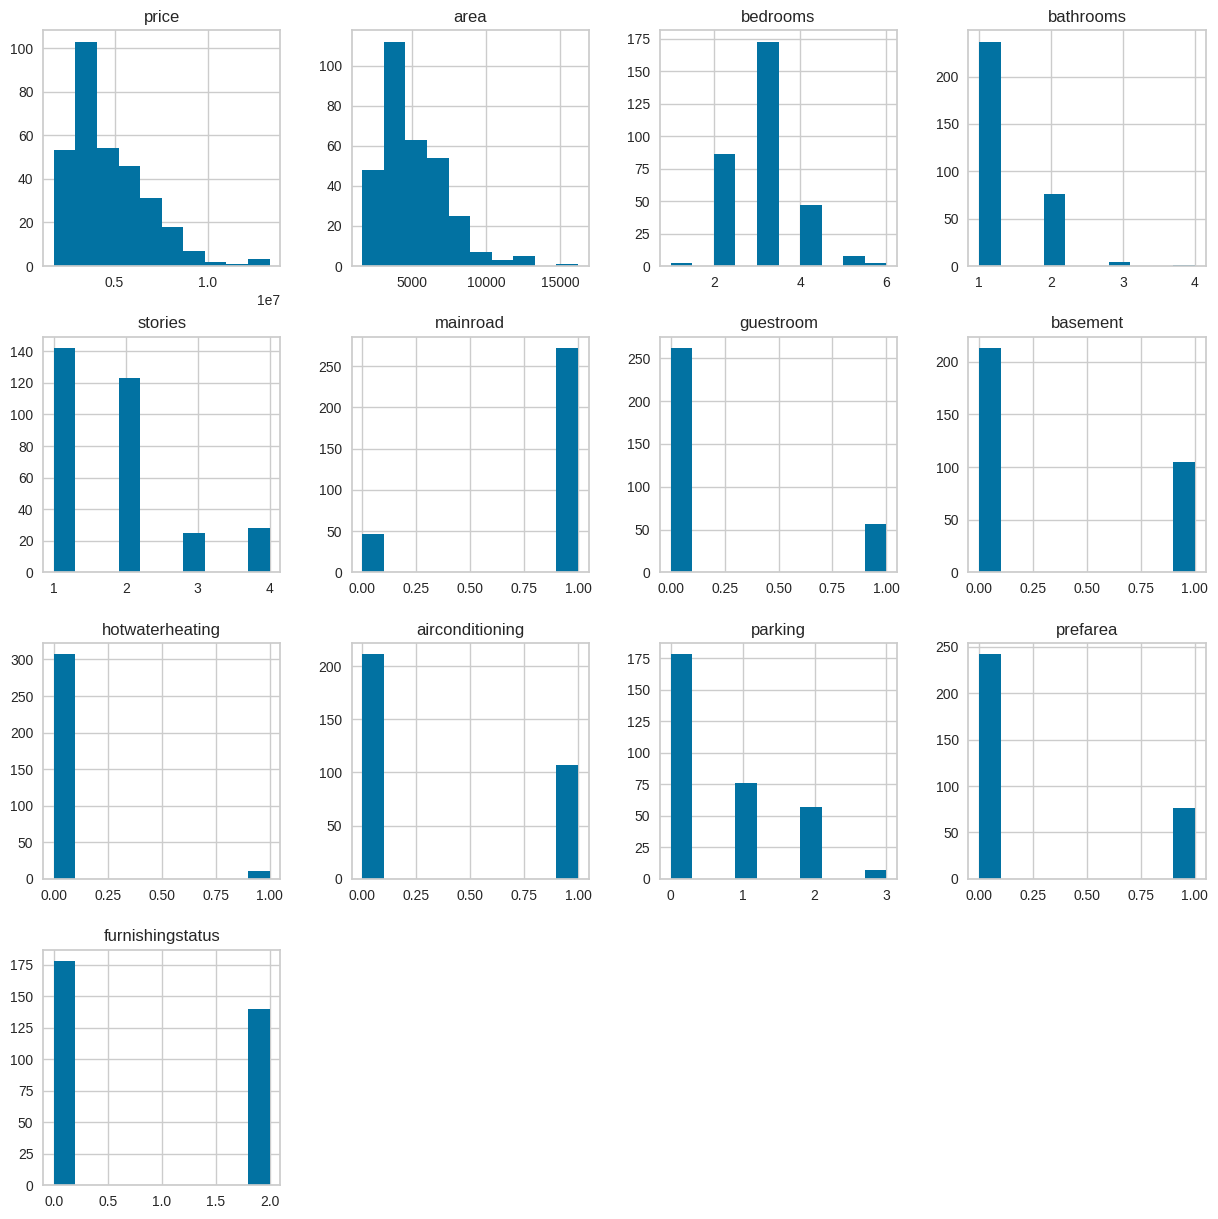

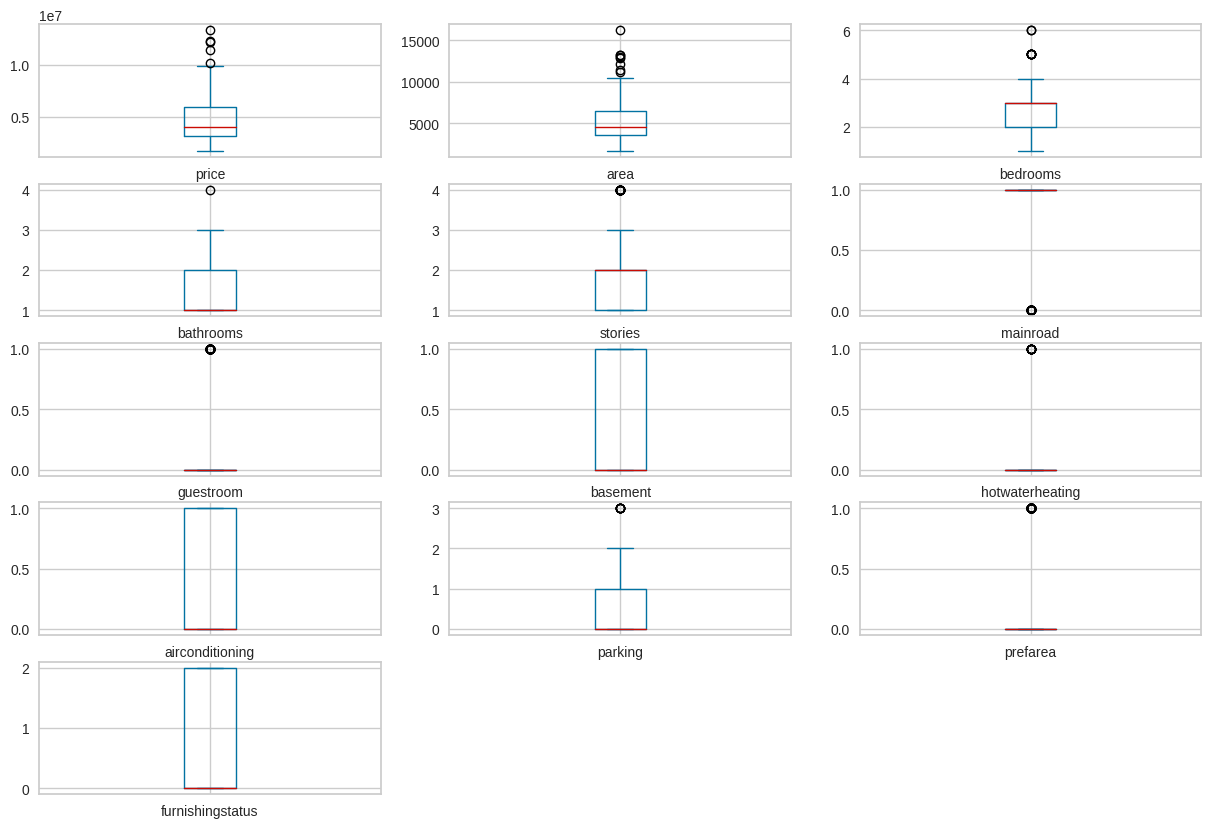

In [ ]:
df.hist(figsize=(15,15))
df.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(5,3), figsize=(15,10))

QQ plots to check for gaussian distribution


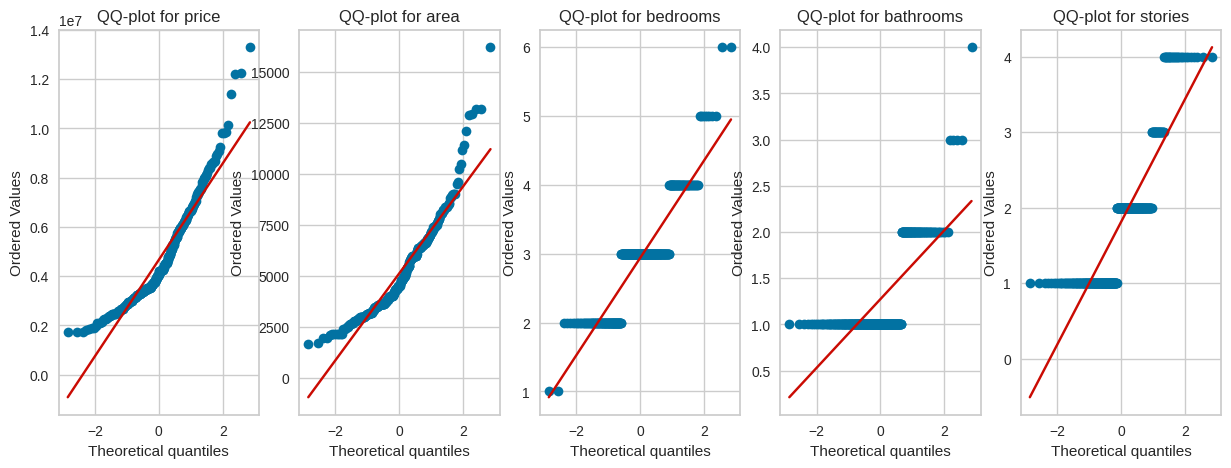

In [ ]:
# Assuming df contains your normalized data

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

for i, column in enumerate(df.columns[:5]):  # Adjust the loop range
    stats.probplot(df[column], plot=axs[i])
    axs[i].set_title(f'QQ-plot for {column}')

plt.show()


In [ ]:

# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming df1 contains your data
# df1 = df.copy()

# # Select columns for IQR normalization
# columns_to_normalize = ['area']  # Add bedrooms/bathrooms/wkda if needed

# # Calculate the IQR for selected columns
# Q1 = df1[columns_to_normalize].quantile(0.25)
# Q3 = df1[columns_to_normalize].quantile(0.75)
# IQR = Q3 - Q1

# # Apply IQR normalization to the selected columns
# df1[columns_to_normalize] = (df1[columns_to_normalize] - Q1) / IQR

# # Plot both together to compare
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# ax[0].hist(df[columns_to_normalize])
# ax[0].set_title('Before IQR Normalization')

# ax[1].hist(df1[columns_to_normalize])
# ax[1].set_title('After IQR Normalization')

# plt.show()

In [ ]:



# # Select columns for IQR normalization
# columns_to_normalize = ['price']  # Add bedrooms/bathrooms/wkda if needed

# # Calculate the IQR for selected columns
# Q1 = df1[columns_to_normalize].quantile(0.25)
# Q3 = df1[columns_to_normalize].quantile(0.75)
# IQR = Q3 - Q1

# # Apply IQR normalization to the selected columns
# df1[columns_to_normalize] = (df1[columns_to_normalize] - Q1) / IQR

# # Plot both together to compare
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# ax[0].hist(df[columns_to_normalize])
# ax[0].set_title('Before IQR Normalization')

# ax[1].hist(df1[columns_to_normalize])
# ax[1].set_title('After IQR Normalization')

# plt.show()

In [ ]:
# # Select columns for normalization
# columns_to_normalize = ['bedrooms', 'bathrooms','stories','parking'] #add bedrooms / bathrooms w kda

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].hist(df1[columns_to_normalize])
# ax[0].set_title('Before Normalization')


# # Normalize only the selected columns
# df_normalized = (df1[columns_to_normalize] - df1[columns_to_normalize].min()) / (df1[columns_to_normalize].max() - df1[columns_to_normalize].min())
# df1[columns_to_normalize] = df_normalized
# ax[1].hist(df_normalized)
# ax[1].set_title('After Normalization')

# plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
##did not normalize the furnshing status
scaler = MinMaxScaler()

xv = df.drop('furnishingstatus',axis=1)


df1 = pd.DataFrame(scaler.fit_transform(xv), columns = xv.columns)
df1['furnishingstatus'] = df['furnishingstatus']

df1



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,2
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,2
2,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,2
3,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,2
4,0.727273,1.000000,0.8,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0.009091,0.092096,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0
314,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0
315,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
316,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2


In [ ]:
furnishingstatus=df['furnishingstatus']
corr_matrix = df1.drop('furnishingstatus',axis=1).corr()

corr_matrix

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
price,1.000000,0.580382,0.398663,0.545256,0.487917,0.309932,0.309247,0.206570,0.103514,0.520721,0.444718,0.331195
area,0.580382,1.000000,0.172115,0.269177,0.164036,0.283936,0.097947,0.065119,0.038593,0.254413,0.405851,0.242823
bedrooms,0.398663,0.172115,1.000000,0.386367,0.399644,0.011141,0.135761,0.137981,0.083043,0.198801,0.168385,0.105221
bathrooms,0.545256,0.269177,0.386367,1.000000,0.401595,0.065047,0.178939,0.071570,0.104448,0.212426,0.206029,0.092900
stories,0.487917,0.164036,0.399644,0.401595,1.000000,0.186987,0.069716,-0.152130,0.020835,0.330471,0.083121,0.125294
mainroad,0.309932,0.283936,0.011141,0.065047,0.186987,1.000000,0.072773,0.117646,-0.068921,0.160407,0.185406,0.188533
guestroom,0.309247,0.097947,0.135761,0.178939,0.069716,0.072773,1.000000,0.395151,-0.042336,0.212414,0.115721,0.166798
basement,0.206570,0.065119,0.137981,0.071570,-0.152130,0.117646,0.395151,1.000000,0.050054,0.066086,0.081757,0.280749
hotwaterheating,0.103514,0.038593,0.083043,0.104448,0.020835,-0.068921,-0.042336,0.050054,1.000000,-0.134796,0.055018,-0.065728
airconditioning,0.520721,0.254413,0.198801,0.212426,0.330471,0.160407,0.212414,0.066086,-0.134796,1.000000,0.196954,0.131519


A common way to visualize correlation matricies is called a heatmap, which is a graphical representation of data where the individual values contained in a matrix are represented as colors.

We can use [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from the `seaborn` library to plot the correlation matrix as a heatmap.

For example we can use red for positive correlation and blue for negative correlation, and every shade in between for values in between.

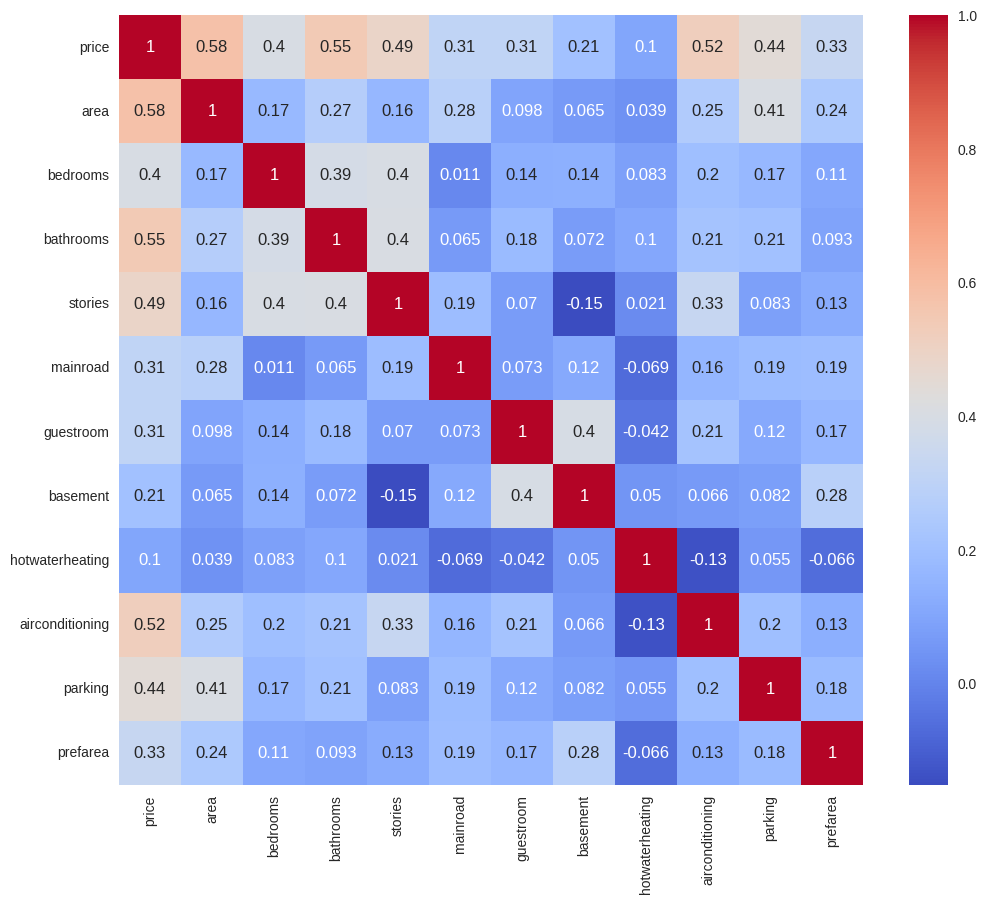

In [ ]:
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm').figure.set_size_inches(12, 10)

plt.show()

#no clear correlation was found

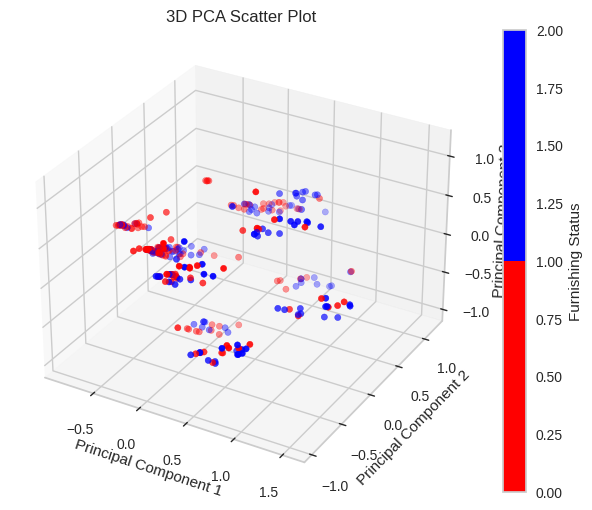

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Assuming pcaSet is your feature dataset and furnishingstatus is your label
# If df1 is your original dataset, you might need to extract furnishingstatus from df1

# Split the dataset into features and labels

pcaSet = df1.copy()
pcaSet = pcaSet.drop(['furnishingstatus'], axis=1)

# Choose the number of components for PCA
components = 3
pca = PCA(n_components=components)

# Fit and transform the original data using PCA
data_pca = pca.fit_transform(pcaSet)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data_pca, columns=['PC'+str(i+1) for i in range(components)])

# Plotting a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a colormap (you can choose a different one if you like)
cmap = ListedColormap(['red',  'blue'])

# Scatter plot with RGB colors based on furnishingstatus
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df1['furnishingstatus'], cmap=cmap, marker='o')

# Create a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Furnishing Status')

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Scatter Plot')

# Show the plot
plt.show()


# PCA

In [ ]:
#One hot encoding
"""
import pandas as pd

# Assuming df contains your data

# Select categorical columns for one-hot encoding
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Use pandas get_dummies to perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# drop_first=True is used to avoid the dummy variable trap (redundancy) by dropping one of the one-hot encoded columns for each categorical variable

# Display the resulting DataFrame with one-hot encoding
print(df_encoded.head())
"""

"\nimport pandas as pd\n\n# Assuming df contains your data\n\n# Select categorical columns for one-hot encoding\ncategorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']\n\n# Use pandas get_dummies to perform one-hot encoding\ndf_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)\n\n# drop_first=True is used to avoid the dummy variable trap (redundancy) by dropping one of the one-hot encoded columns for each categorical variable\n\n# Display the resulting DataFrame with one-hot encoding\nprint(df_encoded.head())\n"

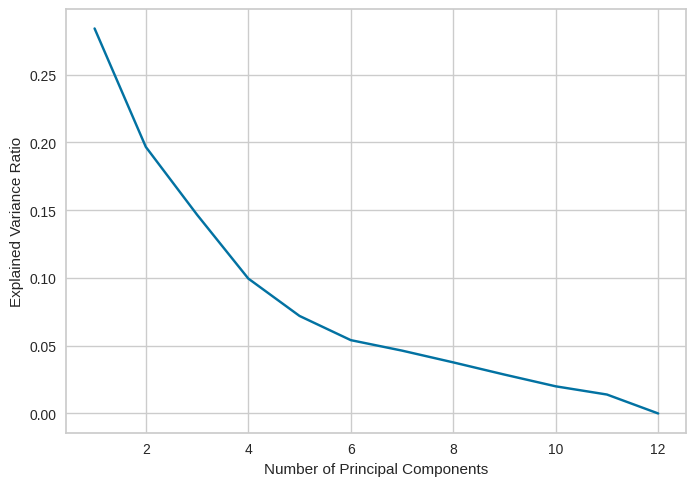

[-0.08742219 -0.05004457 -0.04710573 -0.02759634 -0.0178544  -0.0077326
 -0.00868499 -0.00901126 -0.00865733 -0.00606551 -0.01396932]
0


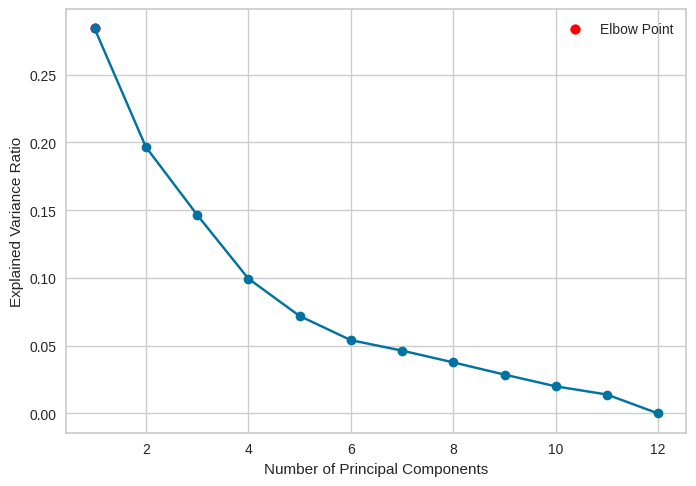

In [ ]:
pca = PCA()
pca.fit(corr_matrix)  # corr_matrix is your feature matrix

# Plot the explained variance for each principal component
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Identify the elbow point
print(np.diff(pca.explained_variance_ratio_))
print(np.argmax(np.diff(pca.explained_variance_ratio_) < 0.01))
elbow_point = np.argmax(np.diff(pca.explained_variance_ratio_) < 0.01) + 1

# Highlight the elbow point on the plot
plt.scatter(elbow_point, pca.explained_variance_ratio_[elbow_point - 1], color='red', marker='o', label='Elbow Point')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='b')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

[0.29119287 0.19843476 0.13036495 0.09303443 0.08340707 0.06429042
 0.06265599 0.02606641 0.01942818 0.01356234 0.0120979  0.00546469]


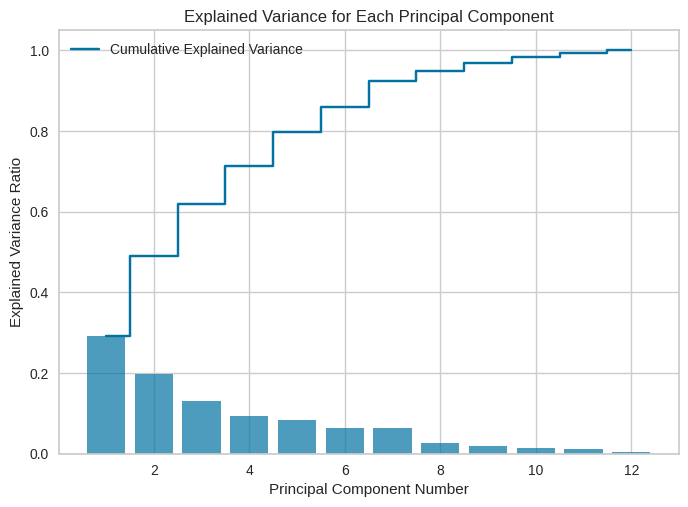

In [ ]:
X = df1.drop(['furnishingstatus'], axis=1)

# Standardize features
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

# Create a bar graph
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance for Each Principal Component')
plt.legend()
plt.show()

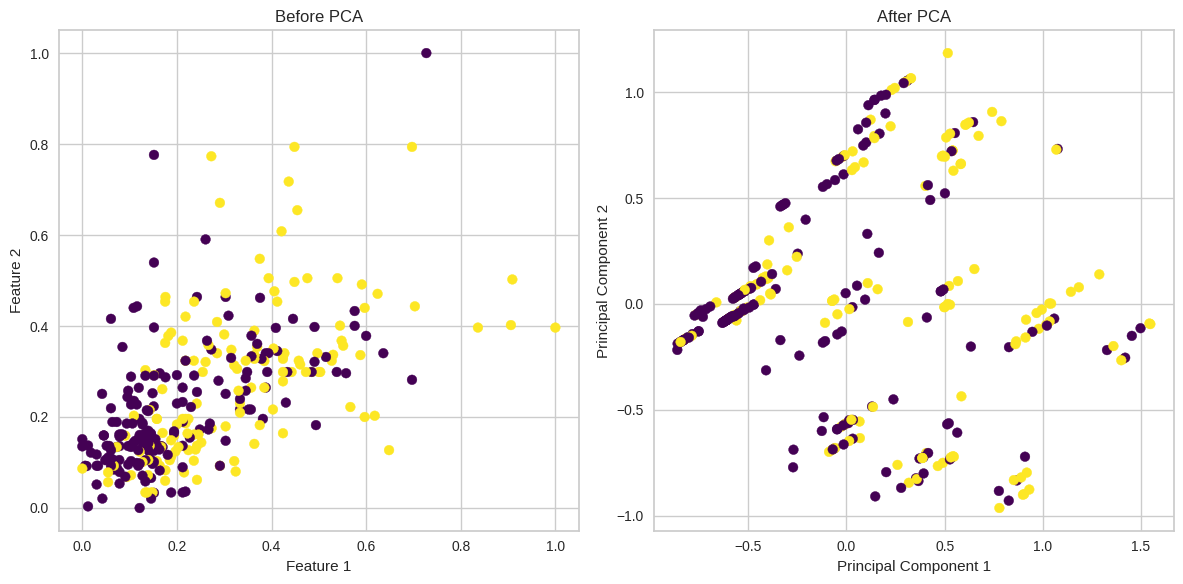

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming pcaSet is your feature dataset and furnishingstatus is your label
# If df1 is your original dataset, you might need to extract furnishingstatus from df1

# Split the dataset into features and labels
pcaSet = df1.copy()
pcaSet = pcaSet.drop(['furnishingstatus'], axis=1)

# Choose the number of components for PCA
components = 6
pca = PCA(n_components=components)

# Fit and transform the original data using PCA
data_pca = pca.fit_transform(pcaSet)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data_pca, columns=['PC'+str(i+1) for i in range(components)])
df_pca['furnishingstatus'] = furnishingstatus

# Scatter plot before PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pcaSet.iloc[:, 0], pcaSet.iloc[:, 1], c=furnishingstatus, cmap='viridis')
plt.title('Before PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Scatter plot after PCA
plt.subplot(1, 2, 2)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['furnishingstatus'], cmap='viridis')
plt.title('After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [ ]:
# Split the dataset into features and labels
pcaSet = df1.copy()
pcaSet = pcaSet.drop(['furnishingstatus'], axis=1)

components = 6 #components=3 or 8 bec above 0.8 variance
pca = PCA(n_components=components)
data_pca = pca.fit_transform(pcaSet)

df2 = pd.DataFrame(data_pca, columns=['PC'+str(i+1) for i in range(components)])
# bensheel menha eltarget columns --> classification furniture status(ask price)/clustering (price w furnishing status)
df2['furnishingstatus'] = furnishingstatus
df2.head()



,PC1,PC2,PC3,PC4,PC5,PC6,furnishingstatus
0,0.789186,0.863287,-0.683732,0.231333,0.008771,0.293685,2
1,0.515944,1.185004,-0.012751,-0.289334,0.222382,0.912822,2
2,1.287621,0.139814,-0.413872,0.076731,-0.452247,0.489937,2
3,1.143080,0.057434,0.741547,-0.248827,0.222751,0.111437,2
4,-0.248245,0.237341,-0.181516,-0.309395,0.285802,0.402511,0


# Classification


1. KNN
2. SVM
1. RF
2. Linear Regression



## **NO PCA all models**

**KNN NO PCA**

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

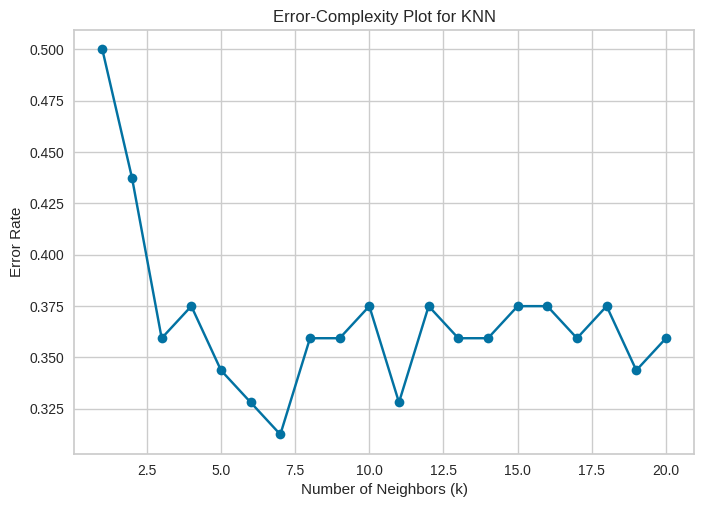

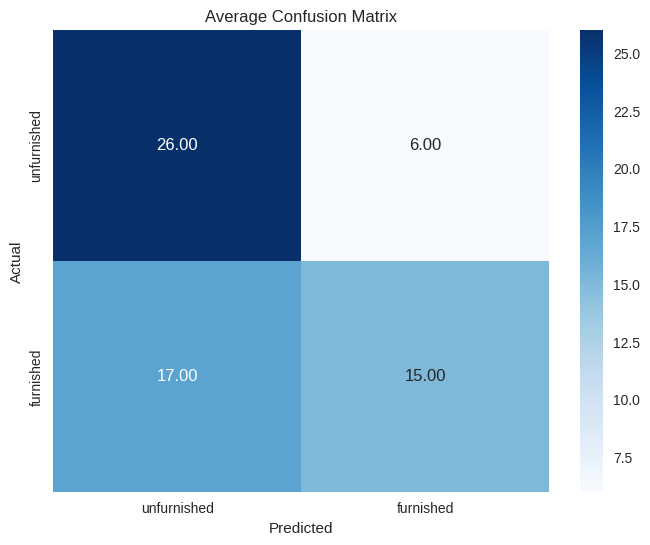

Accuracy: 0.640625
Confusion Matrix:
[[26  6]
 [17 15]]
Classification Report:
              precision    recall  f1-score   support

 unfurnished       0.60      0.81      0.69        32
   furnished       0.71      0.47      0.57        32

    accuracy                           0.64        64
   macro avg       0.66      0.64      0.63        64
weighted avg       0.66      0.64      0.63        64

AUC-ROC: 0.677734375


<ipython-input-22-48a49edbc363>:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nopcadf = nopcadf.append(new_row, ignore_index=True)


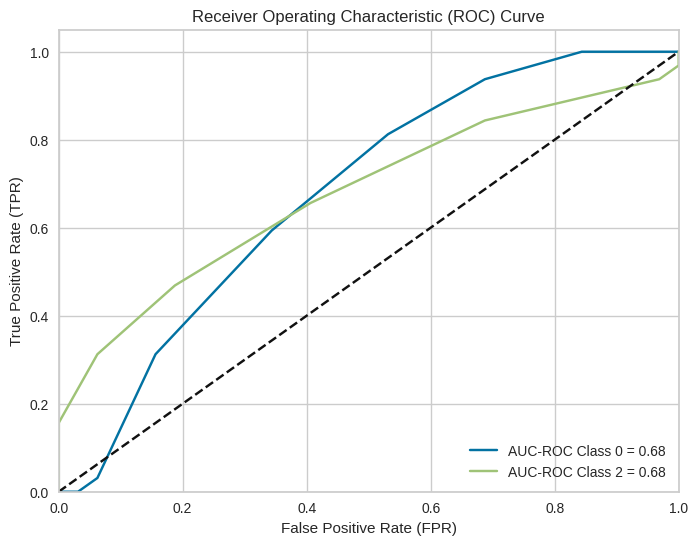

  model name  accuracy  precision    recall        f1       auc
0        KNN  0.640625   0.659468  0.640625  0.629686  0.677734


In [ ]:
###KNN  no PCA
columns = ['model name', 'accuracy', 'precision', 'recall', 'f1', 'auc']

nopcadf = pd.DataFrame(columns=columns)

X = pd.DataFrame(df1.drop(['furnishingstatus'], axis=1))
y = pd.DataFrame(df1, columns=['furnishingstatus'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
error_values = []

# Vary the number of neighbors (k) and evaluate the model
for k in range(1, 21):  # Adjust the range based on your needs
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    error_values.append(error)

# Plot the error-complexity curve
plt.plot(range(1, 21), error_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Error-Complexity Plot for KNN')
plt.show()

k=9 # one of the low points of error complexity --> take larger model is already small
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train.values.ravel())
y_pred = knn_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['unfurnished',  'furnished'], yticklabels=['unfurnished', 'furnished'])
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')



# Calculate AUC-ROC for each class
y_prob = knn_model.predict_proba(X_test)
auc_roc = roc_auc_score(y_test, y_prob[:, 1])  # Select probabilities for the positive class ('furnished')
print(f'AUC-ROC: {auc_roc}')
class_report_dict = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'], output_dict=True)


precision = class_report_dict['macro avg']['precision']
recall = class_report_dict['macro avg']['recall']
f1 = class_report_dict['macro avg']['f1-score']

new_row = {'model name': 'KNN', 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc_roc}
nopcadf = nopcadf.append(new_row, ignore_index=True)
# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(knn_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == knn_model.classes_[i], y_prob[:, i])
    auc = roc_auc_score(y_test == knn_model.classes_[i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'AUC-ROC Class {knn_model.classes_[i]} = {auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(nopcadf)

**Naive Bayes with no PCA **

Accuracy: 0.6770833333333334
Confusion Matrix:
[[40 12]
 [19 25]]
Classification Report:
              precision    recall  f1-score   support

 unfurnished       0.68      0.77      0.72        52
   furnished       0.68      0.57      0.62        44

    accuracy                           0.68        96
   macro avg       0.68      0.67      0.67        96
weighted avg       0.68      0.68      0.67        96

AUC-ROC: 0.7338286713286712


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


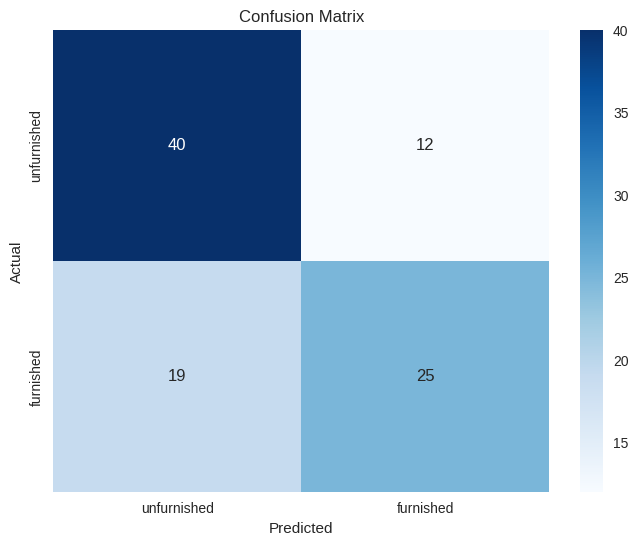

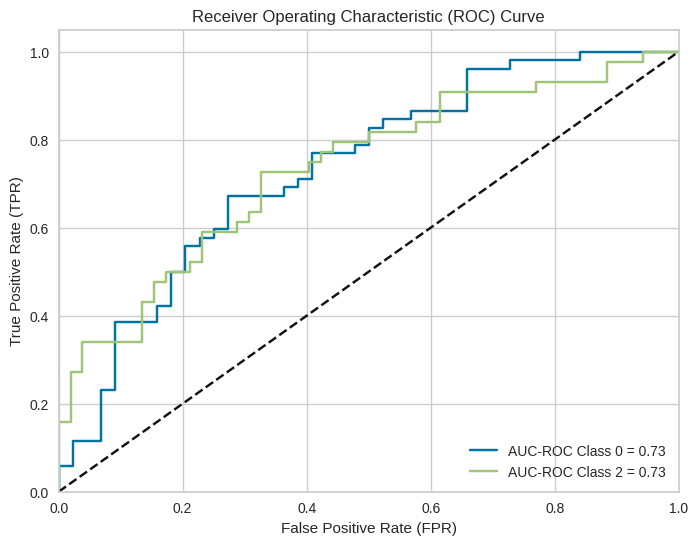

    model name  accuracy  precision    recall        f1       auc
0          KNN  0.640625   0.659468  0.640625  0.629686  0.677734
1  Naive Bayes  0.677083   0.676821  0.668706  0.669002  0.733829


<ipython-input-23-af76b3821de9>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nopcadf = nopcadf.append(new_row, ignore_index=True)


array([0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 2])

In [ ]:
##NB  With no PCA
from sklearn.naive_bayes import GaussianNB
X = pd.DataFrame(df1.drop(['furnishingstatus'], axis=1))
y = pd.DataFrame(df1['furnishingstatus'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

nb_model = GaussianNB()

# Train the model

nb_model.fit(X_train, y_train)

# Make predictions on the test data

predictions = nb_model.predict(X_test)

y_pred = nb_model.predict(X_test)

# Get probability estimates for each class
y_prob = nb_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'])

auc_roc = roc_auc_score(y_test, y_prob[:, 1])  # Select probabilities for the positive class ('furnished')

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'AUC-ROC: {auc_roc}')

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['unfurnished', 'furnished'], yticklabels=['unfurnished',  'furnished'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(nb_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == nb_model.classes_[i], y_prob[:, i])
    auc = roc_auc_score(y_test == nb_model.classes_[i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'AUC-ROC Class {nb_model.classes_[i]} = {auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

class_report_dict = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'], output_dict=True)


precision = class_report_dict['macro avg']['precision']
recall = class_report_dict['macro avg']['recall']
f1 = class_report_dict['macro avg']['f1-score']

new_row = {'model name': 'Naive Bayes', 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc_roc}
nopcadf = nopcadf.append(new_row, ignore_index=True)
print(nopcadf)

predictions

**SVC NO PCA**

<ipython-input-24-f232dee36ed9>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nopcadf = nopcadf.append(new_row, ignore_index=True)


222
Accuracy: 0.6666666666666666
Confusion Matrix:
[[42 14]
 [18 22]]
Classification Report:
              precision    recall  f1-score   support

 unfurnished       0.70      0.75      0.72        56
   furnished       0.61      0.55      0.58        40

    accuracy                           0.67        96
   macro avg       0.66      0.65      0.65        96
weighted avg       0.66      0.67      0.66        96

    model name  accuracy  precision    recall        f1       auc
0          KNN  0.640625   0.659468  0.640625  0.629686  0.677734
1  Naive Bayes  0.677083   0.676821  0.668706  0.669002  0.733829
2          SVC  0.666667   0.655556  0.650000  0.651543  0.733829


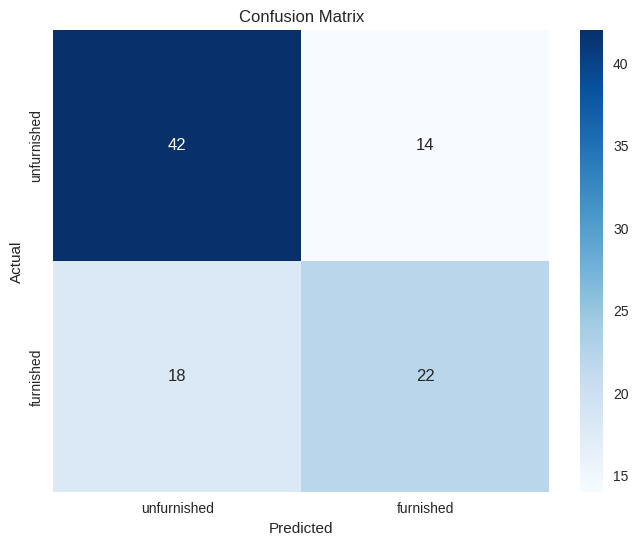

In [ ]:
##SVC NO PCA
X = pd.DataFrame(df1.drop(['furnishingstatus'], axis=1))
y = pd.DataFrame(df1['furnishingstatus'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(len(X_train))

# Create and train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'])

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


class_report_dict = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'], output_dict=True)


precision = class_report_dict['macro avg']['precision']
recall = class_report_dict['macro avg']['recall']
f1 = class_report_dict['macro avg']['f1-score']

new_row = {'model name': 'SVC', 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc_roc}
nopcadf = nopcadf.append(new_row, ignore_index=True)
print(nopcadf)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['unfurnished',  'furnished'], yticklabels=['unfurnished',  'furnished'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



**Random Forest with no PCA**

Accuracy: 0.578125
Confusion Matrix:
[[19 13]
 [14 18]]
Classification Report:
              precision    recall  f1-score   support

 unfurnished       0.58      0.59      0.58        32
   furnished       0.58      0.56      0.57        32

    accuracy                           0.58        64
   macro avg       0.58      0.58      0.58        64
weighted avg       0.58      0.58      0.58        64

AUC-ROC: 0.65283203125


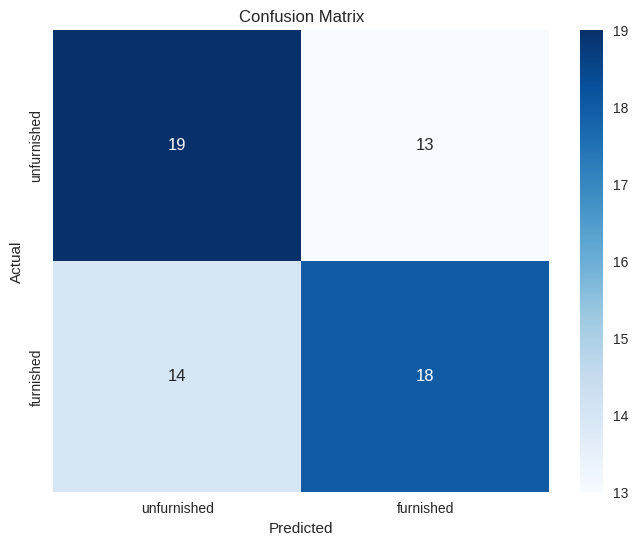

<ipython-input-25-75782e6a3bd9>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nopcadf = nopcadf.append(new_row, ignore_index=True)


      model name  accuracy  precision    recall        f1       auc
0            KNN  0.640625   0.659468  0.640625  0.629686  0.677734
1    Naive Bayes  0.677083   0.676821  0.668706  0.669002  0.733829
2            SVC  0.666667   0.655556  0.650000  0.651543  0.733829
3  Random Forest  0.578125   0.578201  0.578125  0.578022  0.652832


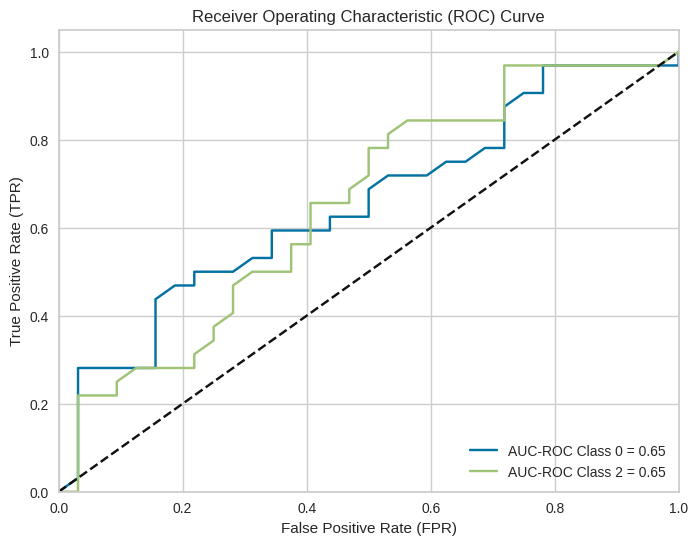

In [ ]:
#RF NO PCA
# Assuming df1 is your DataFrame
X = pd.DataFrame(df1.drop(['furnishingstatus'], axis=1))
y = pd.DataFrame(df1['furnishingstatus'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Get probability estimates for each class
y_prob = rf_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'])

auc_roc = roc_auc_score(y_test, y_prob[:, 1])  # Select probabilities for the positive class ('furnished')

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'AUC-ROC: {auc_roc}')

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['unfurnished', 'furnished'], yticklabels=['unfurnished',  'furnished'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(rf_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == rf_model.classes_[i], y_prob[:, i])
    auc = roc_auc_score(y_test == rf_model.classes_[i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'AUC-ROC Class {rf_model.classes_[i]} = {auc:.2f}')

class_report_dict = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'], output_dict=True)


precision = class_report_dict['macro avg']['precision']
recall = class_report_dict['macro avg']['recall']
f1 = class_report_dict['macro avg']['f1-score']

new_row = {'model name': 'Random Forest', 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc_roc}
nopcadf = nopcadf.append(new_row, ignore_index=True)
print(nopcadf)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Logisitic Regression no PCA**

Accuracy: 0.484375
Confusion Matrix:
[[19 13]
 [20 12]]
Classification Report:
              precision    recall  f1-score   support

 unfurnished       0.49      0.59      0.54        32
   furnished       0.48      0.38      0.42        32

    accuracy                           0.48        64
   macro avg       0.48      0.48      0.48        64
weighted avg       0.48      0.48      0.48        64

AUC-ROC: 0.5595703125


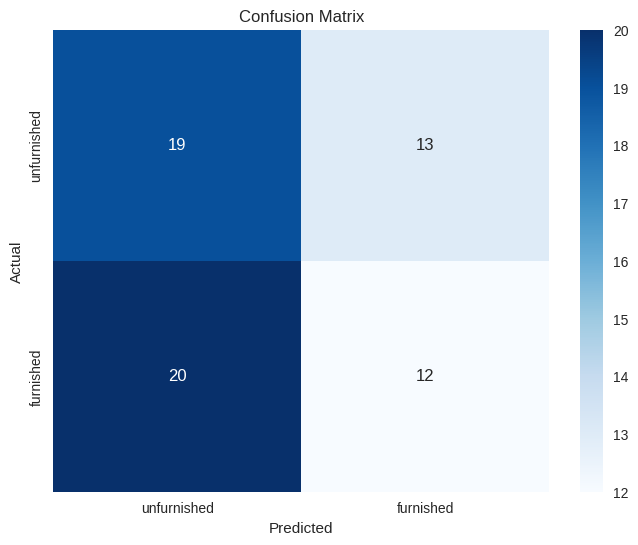

<ipython-input-26-c2a001619714>:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nopcadf = nopcadf.append(new_row, ignore_index=True)


            model name  accuracy  precision    recall        f1       auc
0                  KNN  0.640625   0.659468  0.640625  0.629686  0.677734
1          Naive Bayes  0.677083   0.676821  0.668706  0.669002  0.733829
2                  SVC  0.666667   0.655556  0.650000  0.651543  0.733829
3        Random Forest  0.578125   0.578201  0.578125  0.578022  0.652832
4  Logistic Regression  0.484375   0.483590  0.484375  0.478132  0.559570


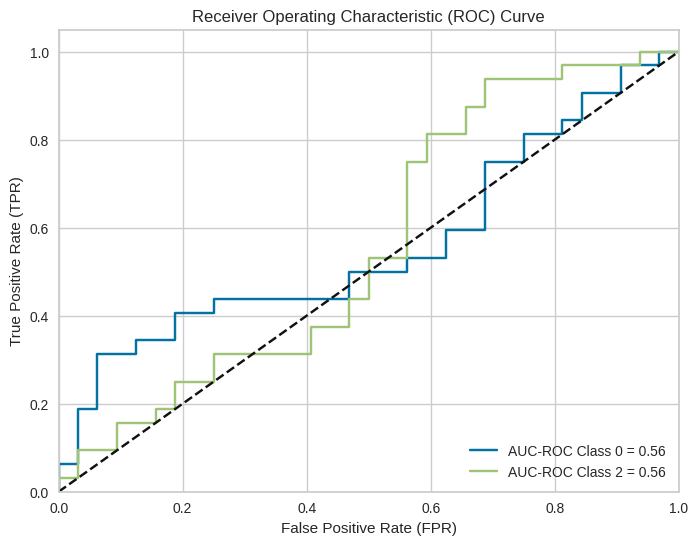

In [ ]:
# Logistic regression with no PCA

X = pd.DataFrame(df1.drop(['furnishingstatus'], axis=1))
y = pd.DataFrame(df1['furnishingstatus'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional, but can be beneficial)
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Create and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, multi_class='ovr')  # 'ovr' for one-vs-rest
logreg_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Get probability estimates for each class
y_prob = logreg_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'])
# Calculate AUC-ROC for each class
y_prob = logreg_model.predict_proba(X_test)
auc_roc = roc_auc_score(y_test, y_prob[:, 1])  # Select probabilities for the positive class ('furnished')

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'AUC-ROC: {auc_roc}')

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['unfurnished', 'furnished'], yticklabels=['unfurnished', 'furnished'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(logreg_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == logreg_model.classes_[i], y_prob[:, i])
    auc = roc_auc_score(y_test == logreg_model.classes_[i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'AUC-ROC Class {logreg_model.classes_[i]} = {auc:.2f}')

class_report_dict = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'], output_dict=True)


precision = class_report_dict['macro avg']['precision']
recall = class_report_dict['macro avg']['recall']
f1 = class_report_dict['macro avg']['f1-score']

new_row = {'model name': 'Logistic Regression', 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc_roc}
nopcadf = nopcadf.append(new_row, ignore_index=True)
print(nopcadf)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [ ]:
print(nopcadf)


            model name  accuracy  precision    recall        f1       auc
0                  KNN  0.640625   0.659468  0.640625  0.629686  0.677734
1          Naive Bayes  0.677083   0.676821  0.668706  0.669002  0.733829
2                  SVC  0.666667   0.655556  0.650000  0.651543  0.733829
3        Random Forest  0.578125   0.578201  0.578125  0.578022  0.652832
4  Logistic Regression  0.484375   0.483590  0.484375  0.478132  0.559570


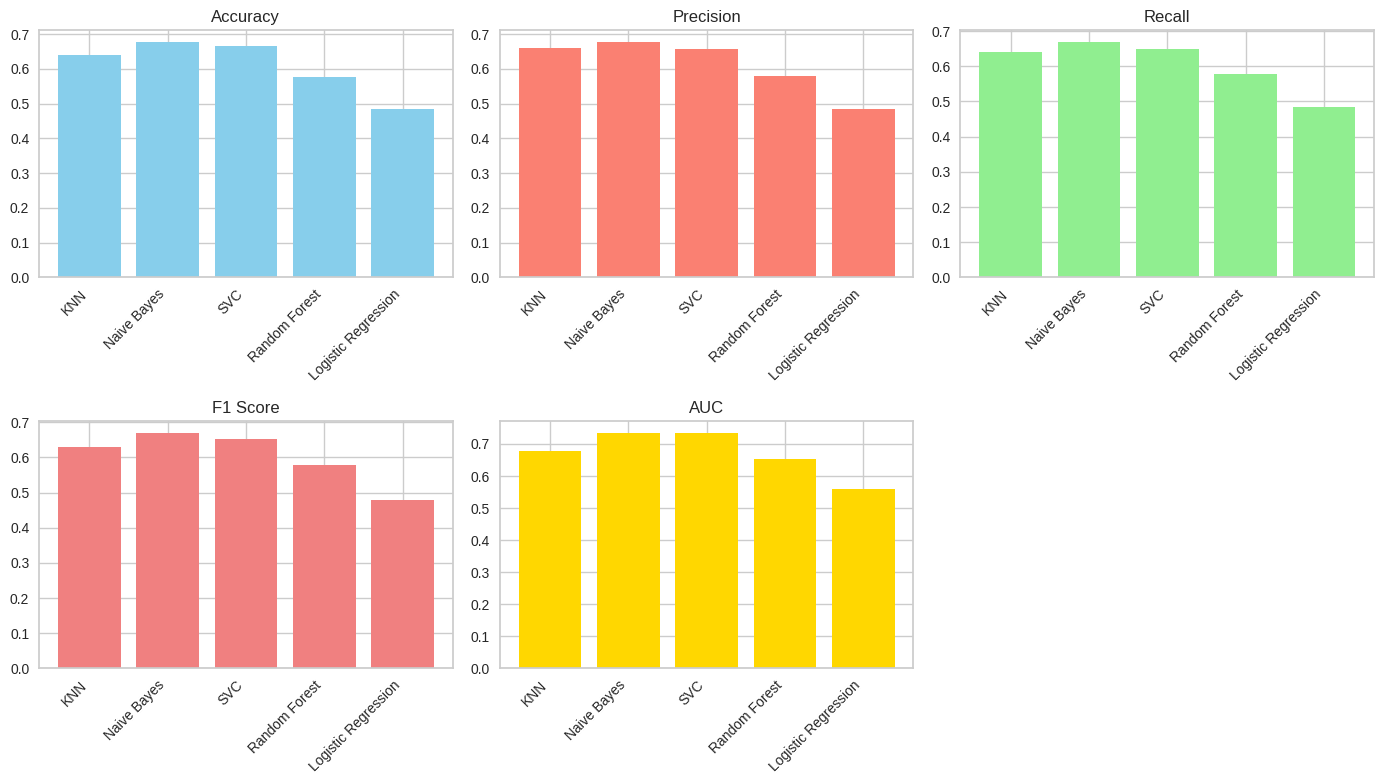

In [ ]:
import matplotlib.pyplot as plt

# Assuming `nopcadf` is your DataFrame
plt.figure(figsize=(14, 8))

# Bar graph for accuracy
plt.subplot(2, 3, 1)
plt.bar(nopcadf['model name'], nopcadf['accuracy'], color='skyblue')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')


# Bar graph for precision
plt.subplot(2, 3, 2)
plt.bar(nopcadf['model name'], nopcadf['precision'], color='salmon')
plt.title('Precision')
plt.xticks(rotation=45, ha='right')


# Bar graph for recall
plt.subplot(2, 3, 3)
plt.bar(nopcadf['model name'], nopcadf['recall'], color='lightgreen')
plt.title('Recall')
plt.xticks(rotation=45, ha='right')


# Bar graph for F1 score
plt.subplot(2, 3, 4)
plt.bar(nopcadf['model name'], nopcadf['f1'], color='lightcoral')
plt.title('F1 Score')
plt.xticks(rotation=45, ha='right')


# Bar graph for AUC
plt.subplot(2, 3, 5)
plt.bar(nopcadf['model name'], nopcadf['auc'], color='gold')
plt.title('AUC')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# **Using PCA**

**KNN With PCA**

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

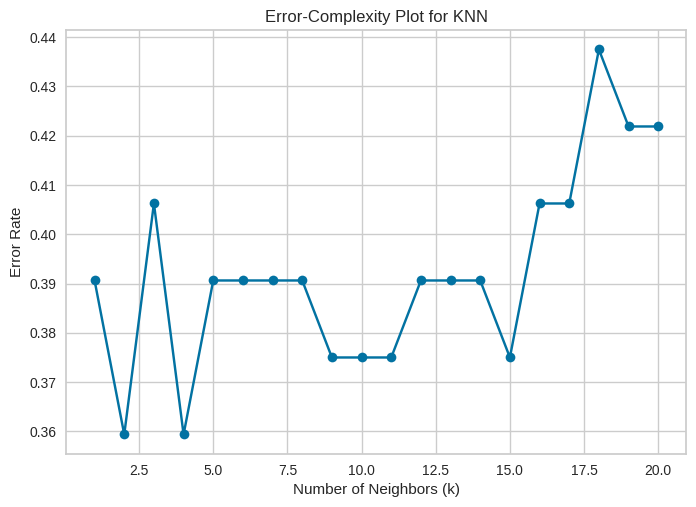

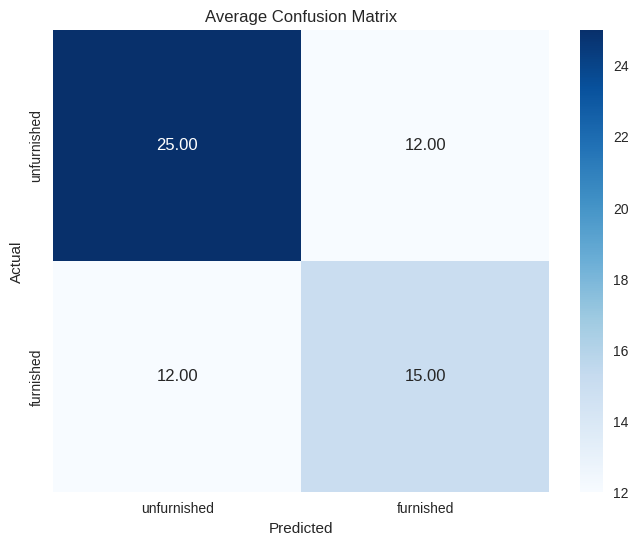

Accuracy: 0.625
Confusion Matrix:
[[25 12]
 [12 15]]
Classification Report:
              precision    recall  f1-score   support

 unfurnished       0.68      0.68      0.68        37
   furnished       0.56      0.56      0.56        27

    accuracy                           0.62        64
   macro avg       0.62      0.62      0.62        64
weighted avg       0.62      0.62      0.62        64

AUC-ROC: 0.624124124124124


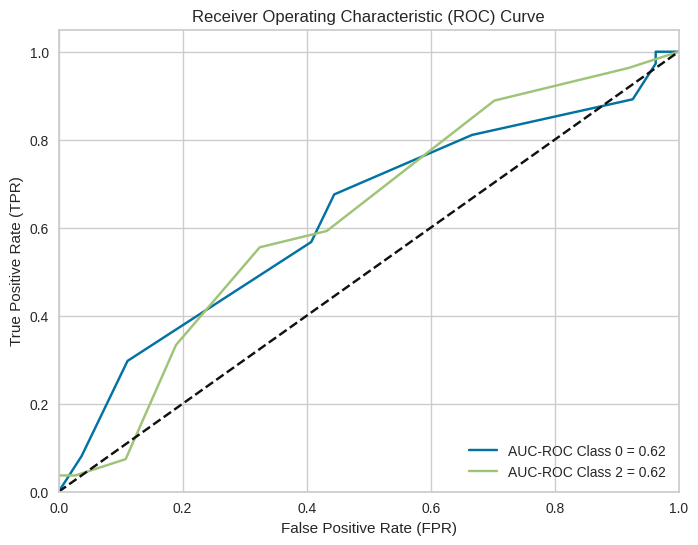

  model name  accuracy  precision    recall        f1       auc
0    KNN-PCA     0.625   0.615616  0.615616  0.615616  0.624124


<ipython-input-28-312256222ff6>:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pcadf = pcadf.append(new_row, ignore_index=True)


In [ ]:
###KNN  PCA
columns = ['model name', 'accuracy', 'precision', 'recall', 'f1', 'auc']

pcadf = pd.DataFrame(columns=columns)


X = pd.DataFrame(df2.drop(['furnishingstatus'], axis=1))
y = pd.DataFrame(df2, columns=['furnishingstatus'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
error_values = []

# Vary the number of neighbors (k) and evaluate the model
for k in range(1, 21):  # Adjust the range based on your needs
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    error_values.append(error)

# Plot the error-complexity curve
plt.plot(range(1, 21), error_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Error-Complexity Plot for KNN')
plt.show()

k=9 # one of the low points of error complexity --> take larger model is already small
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train.values.ravel())
y_pred = knn_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['unfurnished',  'furnished'], yticklabels=['unfurnished', 'furnished'])
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Calculate AUC-ROC for each class
y_prob = knn_model.predict_proba(X_test)
auc_roc = roc_auc_score(y_test, y_prob[:, 1])  # Select probabilities for the positive class ('furnished')
print(f'AUC-ROC: {auc_roc}')

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(knn_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == knn_model.classes_[i], y_prob[:, i])
    auc = roc_auc_score(y_test == knn_model.classes_[i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'AUC-ROC Class {knn_model.classes_[i]} = {auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

class_report_dict = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'], output_dict=True)


precision = class_report_dict['macro avg']['precision']
recall = class_report_dict['macro avg']['recall']
f1 = class_report_dict['macro avg']['f1-score']

new_row = {'model name': 'KNN-PCA', 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc_roc}
pcadf = pcadf.append(new_row, ignore_index=True)
print(pcadf)




**Naive Bayes with PCA**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6666666666666666
Confusion Matrix:
[[37 18]
 [14 27]]
Classification Report:
              precision    recall  f1-score   support

 unfurnished       0.73      0.67      0.70        55
   furnished       0.60      0.66      0.63        41

    accuracy                           0.67        96
   macro avg       0.66      0.67      0.66        96
weighted avg       0.67      0.67      0.67        96

AUC-ROC: 0.7286031042128603


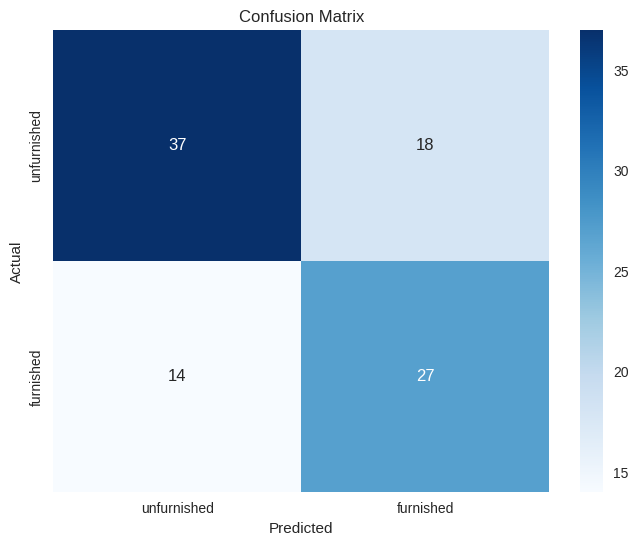

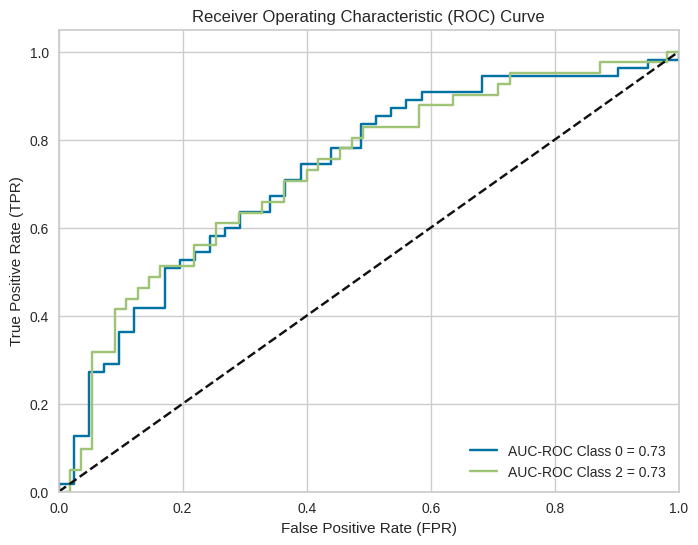

  model name  accuracy  precision    recall        f1       auc
0    KNN-PCA  0.625000   0.615616  0.615616  0.615616  0.624124
1     NB-PCA  0.666667   0.662745  0.665632  0.663010  0.728603


<ipython-input-29-b017c5d13406>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pcadf = pcadf.append(new_row, ignore_index=True)


In [ ]:
##NB  With  PCA
from sklearn.naive_bayes import GaussianNB
X = pd.DataFrame(df2.drop(['furnishingstatus'], axis=1))
y = pd.DataFrame(df2['furnishingstatus'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

nb_model = GaussianNB()

# Train the model

nb_model.fit(X_train, y_train)

# Make predictions on the test data

predictions = nb_model.predict(X_test)

y_pred = nb_model.predict(X_test)

# Get probability estimates for each class
y_prob = nb_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'])

auc_roc = roc_auc_score(y_test, y_prob[:, 1])  # Select probabilities for the positive class ('furnished')

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'AUC-ROC: {auc_roc}')

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['unfurnished', 'furnished'], yticklabels=['unfurnished',  'furnished'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(rf_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == rf_model.classes_[i], y_prob[:, i])
    auc = roc_auc_score(y_test == rf_model.classes_[i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'AUC-ROC Class {rf_model.classes_[i]} = {auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

predictions

class_report_dict = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'], output_dict=True)


precision = class_report_dict['macro avg']['precision']
recall = class_report_dict['macro avg']['recall']
f1 = class_report_dict['macro avg']['f1-score']

new_row = {'model name': 'NB-PCA', 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc_roc}
pcadf = pcadf.append(new_row, ignore_index=True)
print(pcadf)

**Random Forest with PCA**

AUC-ROC: 0.5478515625
Accuracy: 0.53125
Confusion Matrix:
[[19 13]
 [17 15]]
Classification Report:
              precision    recall  f1-score   support

 unfurnished       0.53      0.59      0.56        32
   furnished       0.54      0.47      0.50        32

    accuracy                           0.53        64
   macro avg       0.53      0.53      0.53        64
weighted avg       0.53      0.53      0.53        64

Recall: 0.53125


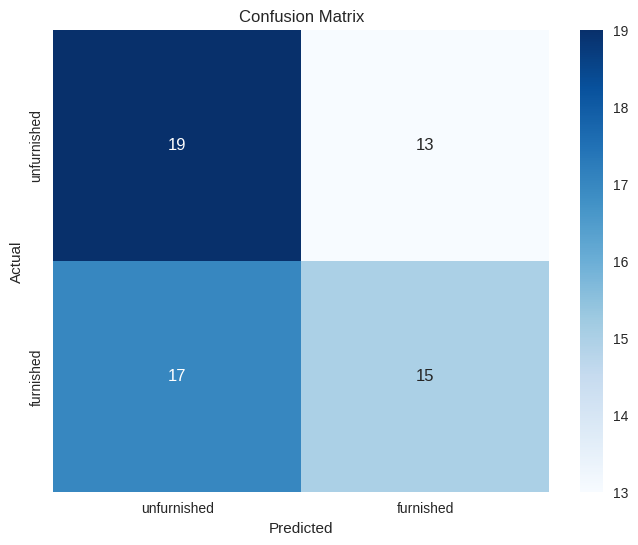

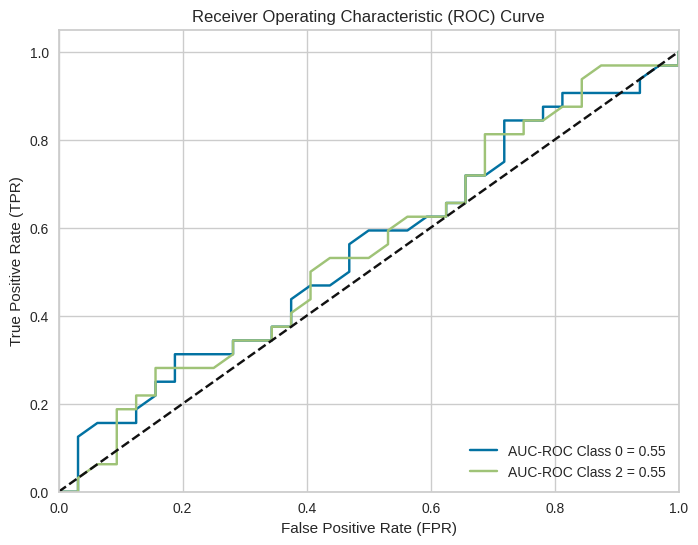

         model name  accuracy  precision    recall        f1       auc
0           KNN-PCA  0.625000   0.615616  0.615616  0.615616  0.624124
1            NB-PCA  0.666667   0.662745  0.665632  0.663010  0.728603
2  RandomForest-PCA  0.531250   0.531746  0.531250  0.529412  0.547852


<ipython-input-30-02530293820d>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pcadf = pcadf.append(new_row, ignore_index=True)


In [ ]:
##RF WITH PCA
X = pd.DataFrame(df2.drop(['furnishingstatus'], axis=1))
y = pd.DataFrame(df2['furnishingstatus'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Get probability estimates for each class
y_prob = rf_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['unfurnished',  'furnished'])

auc_roc = roc_auc_score(y_test, y_prob[:, 1])  # Select probabilities for the positive class ('furnished')
print(f'AUC-ROC: {auc_roc}')

# Calculate weighted recall
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'Recall: {recall}')

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['unfurnished', 'furnished'], yticklabels=['unfurnished', 'furnished'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(rf_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == rf_model.classes_[i], y_prob[:, i])
    auc = roc_auc_score(y_test == rf_model.classes_[i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'AUC-ROC Class {rf_model.classes_[i]} = {auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


class_report_dict = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'], output_dict=True)


precision = class_report_dict['macro avg']['precision']
recall = class_report_dict['macro avg']['recall']
f1 = class_report_dict['macro avg']['f1-score']

new_row = {'model name': 'RandomForest-PCA', 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc_roc}
pcadf = pcadf.append(new_row, ignore_index=True)
print(pcadf)



**SVC with PCA**

Accuracy: 0.4375
Confusion Matrix:
[[18 14]
 [22 10]]
Classification Report:
              precision    recall  f1-score   support

 unfurnished       0.45      0.56      0.50        32
   furnished       0.42      0.31      0.36        32

    accuracy                           0.44        64
   macro avg       0.43      0.44      0.43        64
weighted avg       0.43      0.44      0.43        64



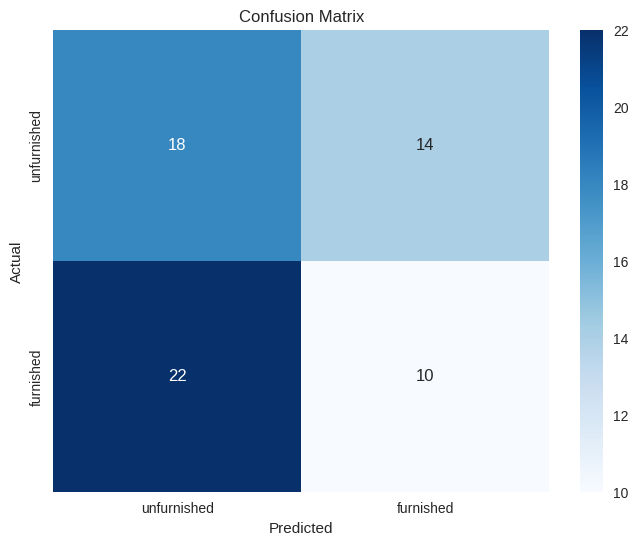

         model name  accuracy  precision    recall        f1       auc
0           KNN-PCA  0.625000   0.615616  0.615616  0.615616  0.624124
1            NB-PCA  0.666667   0.662745  0.665632  0.663010  0.728603
2  RandomForest-PCA  0.531250   0.531746  0.531250  0.529412  0.547852
3           SVC-PCA  0.437500   0.433333  0.437500  0.428571  0.547852


<ipython-input-31-1b58eed4a9a5>:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pcadf = pcadf.append(new_row, ignore_index=True)


In [ ]:
#SVM PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df1 is your DataFrame
X = pd.DataFrame(df2.drop(['furnishingstatus'], axis=1))
y = pd.DataFrame(df2['furnishingstatus'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional, but can be beneficial for SVM)
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['unfurnished',  'furnished'])

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['unfurnished',  'furnished'], yticklabels=['unfurnished',  'furnished'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# y_prob = svm_model.predict_proba(X_test)
# auc_roc = roc_auc_score(y_test, y_prob[:, 1])  # Select probabilities for the positive class ('furnished')
# print(f'AUC-ROC: {auc_roc}')
# # Plot ROC Curve for each class
# plt.figure(figsize=(8, 6))
# for i in range(len(svm_model.classes_)):
#     fpr, tpr, _ = roc_curve(y_test == svm_model.classes_[i], y_prob[:, i])
#     auc = roc_auc_score(y_test == svm_model.classes_[i], y_prob[:, i])
#     plt.plot(fpr, tpr, label=f'AUC-ROC Class {svm_model.classes_[i]} = {auc:.2f}')

# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.show()

class_report_dict = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'], output_dict=True)


precision = class_report_dict['macro avg']['precision']
recall = class_report_dict['macro avg']['recall']
f1 = class_report_dict['macro avg']['f1-score']

new_row = {'model name': 'SVC-PCA', 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc_roc}
pcadf = pcadf.append(new_row, ignore_index=True)
print(pcadf)

**Logistic regression with PCA**

Accuracy: 0.453125
Confusion Matrix:
[[18 14]
 [21 11]]
Classification Report:
              precision    recall  f1-score   support

 unfurnished       0.46      0.56      0.51        32
   furnished       0.44      0.34      0.39        32

    accuracy                           0.45        64
   macro avg       0.45      0.45      0.45        64
weighted avg       0.45      0.45      0.45        64

AUC-ROC: 0.5419921875


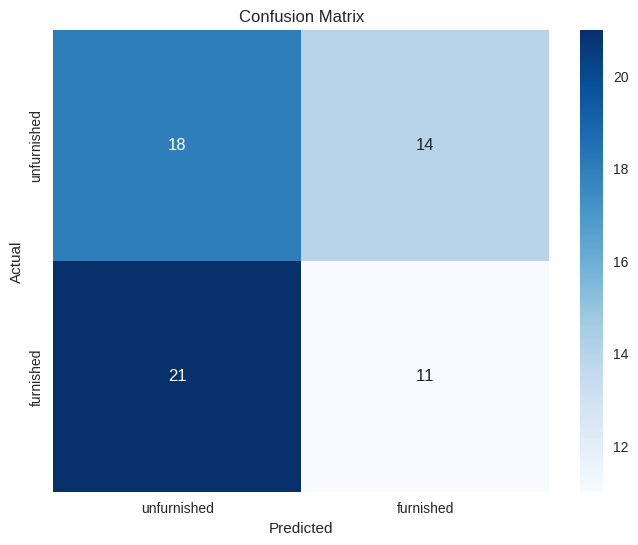

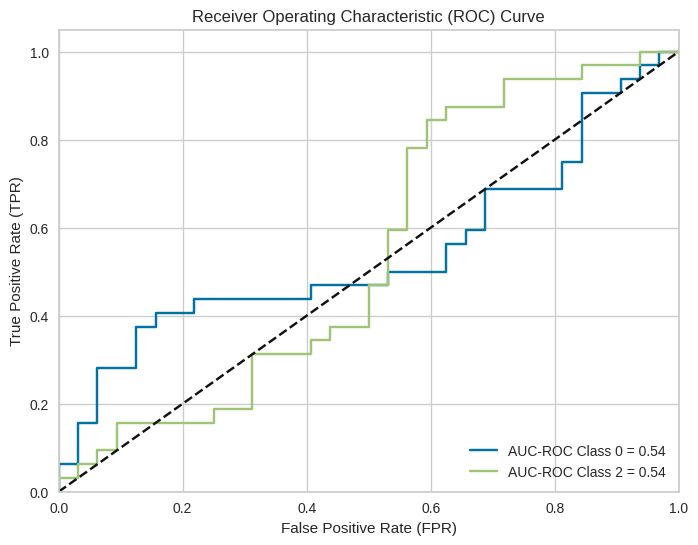

               model name  accuracy  precision    recall        f1       auc
0                 KNN-PCA  0.625000   0.615616  0.615616  0.615616  0.624124
1                  NB-PCA  0.666667   0.662745  0.665632  0.663010  0.728603
2        RandomForest-PCA  0.531250   0.531746  0.531250  0.529412  0.547852
3                 SVC-PCA  0.437500   0.433333  0.437500  0.428571  0.547852
4  LogisticRegression-PCA  0.453125   0.450769  0.453125  0.446504  0.541992


<ipython-input-32-5d61579aeb31>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pcadf = pcadf.append(new_row, ignore_index=True)


In [ ]:
# Logistic regression PCA

X = pd.DataFrame(df2.drop(['furnishingstatus'], axis=1))
y = pd.DataFrame(df2['furnishingstatus'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional, but can be beneficial)
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Create and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, multi_class='ovr')  # 'ovr' for one-vs-rest
logreg_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Get probability estimates for each class
y_prob = logreg_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'])
# Calculate AUC-ROC for each class
y_prob = logreg_model.predict_proba(X_test)
auc_roc = roc_auc_score(y_test, y_prob[:, 1])  # Select probabilities for the positive class ('furnished')

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print(f'AUC-ROC: {auc_roc}')

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['unfurnished', 'furnished'], yticklabels=['unfurnished', 'furnished'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(logreg_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == logreg_model.classes_[i], y_prob[:, i])
    auc = roc_auc_score(y_test == logreg_model.classes_[i], y_prob[:, i])
    plt.plot(fpr, tpr, label=f'AUC-ROC Class {logreg_model.classes_[i]} = {auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

class_report_dict = classification_report(y_test, y_pred, target_names=['unfurnished', 'furnished'], output_dict=True)


precision = class_report_dict['macro avg']['precision']
recall = class_report_dict['macro avg']['recall']
f1 = class_report_dict['macro avg']['f1-score']

new_row = {'model name': 'LogisticRegression-PCA', 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc_roc}
pcadf = pcadf.append(new_row, ignore_index=True)
print(pcadf)



In [ ]:
print(pcadf)

               model name  accuracy  precision    recall        f1       auc
0                 KNN-PCA  0.625000   0.615616  0.615616  0.615616  0.624124
1                  NB-PCA  0.666667   0.662745  0.665632  0.663010  0.728603
2        RandomForest-PCA  0.531250   0.531746  0.531250  0.529412  0.547852
3                 SVC-PCA  0.437500   0.433333  0.437500  0.428571  0.547852
4  LogisticRegression-PCA  0.453125   0.450769  0.453125  0.446504  0.541992


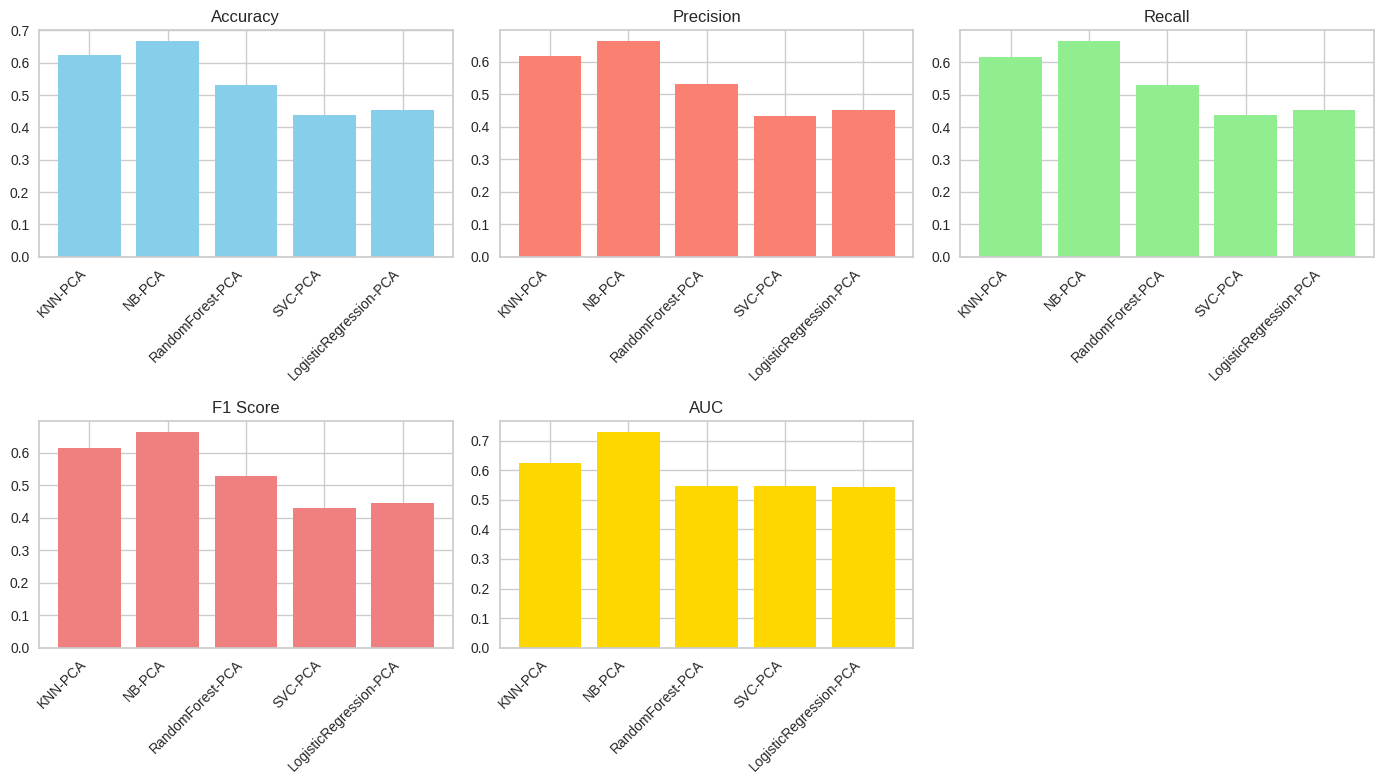

In [ ]:
import matplotlib.pyplot as plt

# Assuming `pcadf` is your DataFrame
plt.figure(figsize=(14, 8))

# Bar graph for accuracy
plt.subplot(2, 3, 1)
plt.bar(pcadf['model name'], pcadf['accuracy'], color='skyblue')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')


# Bar graph for precision
plt.subplot(2, 3, 2)
plt.bar(pcadf['model name'], pcadf['precision'], color='salmon')
plt.title('Precision')
plt.xticks(rotation=45, ha='right')


# Bar graph for recall
plt.subplot(2, 3, 3)
plt.bar(pcadf['model name'], pcadf['recall'], color='lightgreen')
plt.title('Recall')
plt.xticks(rotation=45, ha='right')


# Bar graph for F1 score
plt.subplot(2, 3, 4)
plt.bar(pcadf['model name'], pcadf['f1'], color='lightcoral')
plt.title('F1 Score')
plt.xticks(rotation=45, ha='right')


# Bar graph for AUC
plt.subplot(2, 3, 5)
plt.bar(pcadf['model name'], pcadf['auc'], color='gold')
plt.title('AUC')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


**Clustering**

1.   KMeans
2.   KModes
1.   Agglomerative Clustering







# 1. KMeans


### Cluster Choice


In [ ]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,2
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,2
2,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,2
3,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,2
4,0.727273,1.000000,0.8,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0.009091,0.092096,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0
314,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0
315,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
316,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2


Text(0, 0.5, 'WCSS')

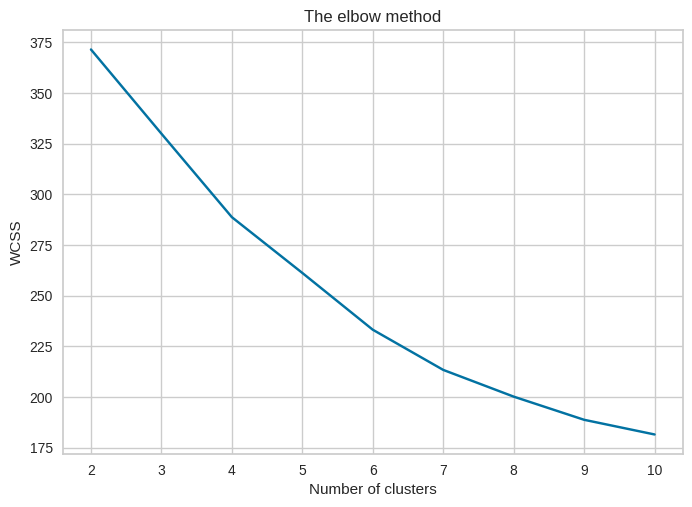

In [ ]:
#KMeans Elbow method for cluster choice (PCA Data) --> 5-6
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

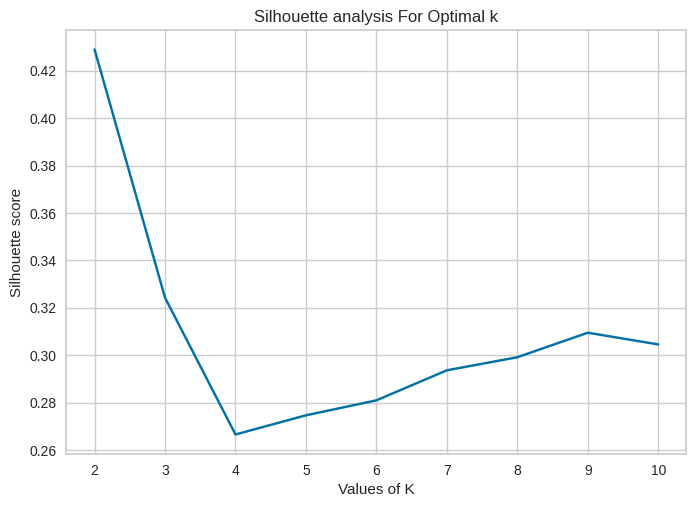

In [ ]:
#KMeans Avg Silhouette method for cluster choice confirmation (PCA Data) -->6
avg_silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    KmeansRes = kmeans.fit(df1)
    cluster_labels = kmeans.labels_
    avg_silhouette.append(silhouette_score(df1, cluster_labels))

plt.plot(range(2, 11),avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

## Model Evaluation and Visualization

In [ ]:
df1
columns = ['model name', '#clusters', 'silloutte', 'dbi']

crdf = pd.DataFrame(columns=columns)


For n_clusters = 2 The average silhouette_score is : 0.42894866495531897


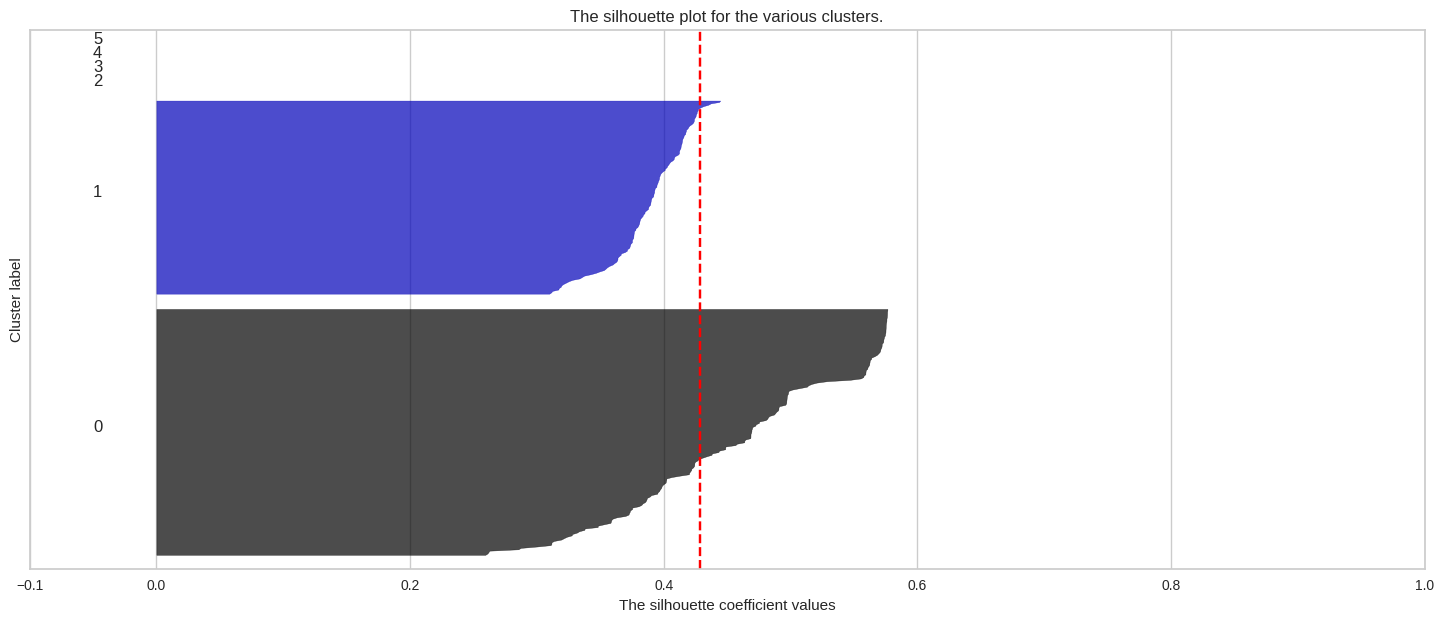

Davies-Bouldin Index for KMeans: 1.0303148339418688
  model name #clusters  silloutte       dbi
0     Kmeans         2   0.428949  1.030315


<ipython-input-38-5519311b03f5>:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crdf = crdf.append(new_row, ignore_index=True)


'\nkm = KMeans(n_clusters=6, init=\'k-means++\', max_iter=300, n_init=10, random_state=0)\ny = km.fit_predict(df2)\nclustersOfKmeans = km.labels_\n\n\nscore = silhouette_score(df2, km.labels_)\nprint(\'Silhouetter Score for Kmeans: %.3f\' % score)\n\n\nx = davies_bouldin_score(df2, clustersOfKmeans)\nprint(f"Davies-Bouldin Index for KMeans: {x}")\n\ndf2[\'cluster\'] = clustersOfKmeans\n\ndf2\n'

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import numpy as np

# Your data (df1) and KMeans clustering code remains the same

# Fit KMeans model
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y = km.fit_predict(df1)
clustersOfKmeans = km.labels_

# Silhouette Analysis
score = silhouette_score(df1, km.labels_)

# Compute silhouette scores for each sample
silhouette_values = silhouette_samples(df1, km.labels_)

# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots()
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1, but in this example, all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(df1) + (6 + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = km
cluster_labels = km.labels_

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(df1, cluster_labels)
print("For n_clusters =", 2,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df1, cluster_labels)

y_lower = 10
for i in range(6):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 6)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Rest of your code
x = davies_bouldin_score(df1, clustersOfKmeans)
print(f"Davies-Bouldin Index for KMeans: {x}")
newdataset = df1.copy()

df1['clusterOfKMeans'] = clustersOfKmeans

new_row = {'model name': 'Kmeans', '#clusters': 2, 'silloutte': score, 'dbi': x}
crdf = crdf.append(new_row, ignore_index=True)


print(crdf)

"""
km = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
y = km.fit_predict(df2)
clustersOfKmeans = km.labels_


score = silhouette_score(df2, km.labels_)
print('Silhouetter Score for Kmeans: %.3f' % score)


x = davies_bouldin_score(df2, clustersOfKmeans)
print(f"Davies-Bouldin Index for KMeans: {x}")

df2['cluster'] = clustersOfKmeans

df2
"""

In [ ]:
# #Pair Plot
# sns.pairplot(df1, hue='cluster', palette='viridis')
# plt.show()


In [ ]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,clusterOfKMeans
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,2,1
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,2,1
2,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,2,1
3,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,2,1
4,0.727273,1.000000,0.8,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0.009091,0.092096,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0,0
314,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0,0
315,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0
316,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2,1


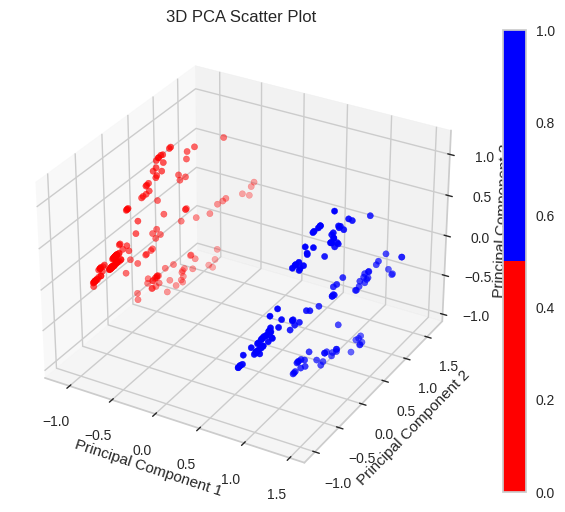

In [ ]:
# Further Dimension Reduction for Visualization
pcaSet1 = df1.copy()
pcaSet1 = pcaSet1.drop(['clusterOfKMeans'],axis=1)

pcaSet1.head()

components = 3
pca1 = PCA(n_components=components)

# fit and transform the data using pca
data_pca1 = pca1.fit_transform(pcaSet1)

#data ba3d pca
data_pca1= pd.DataFrame(data_pca1, columns=['PC'+str(i+1) for i in range(components)])

#data_pca1 = df.sort_values(by='price', ascending=True)
# bensheel menha eltarget columns --> classification furniture status(ask price)/clustering (price w furnishing status)

data_pca1['clusterOfKMeans'] = clustersOfKmeans

#data_pca1.head()

# Plotting a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a colormap (you can choose a different one if you like)
# cmap = ListedColormap(['red',  'blue','green','yellow'])
cmap = ListedColormap(['red',  'blue'])
# Scatter plot with RGB colors based on furnishingstatus
scatter = ax.scatter(data_pca1['PC1'], data_pca1['PC2'], data_pca1['PC3'], c=data_pca1['clusterOfKMeans'], cmap=cmap, marker='o')

# Create a colorbar
cbar = plt.colorbar(scatter)


# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Scatter Plot')

# Show the plot
plt.show()


In [ ]:
data_pca1

,PC1,PC2,PC3,clusterOfKMeans
0,1.338321,0.343256,0.852895,1
1,1.314241,0.004655,1.124576,1
2,1.439715,0.913920,0.194948,1
3,1.390058,0.800724,0.104747,1
4,-0.863010,-0.098911,0.251879,0
...,...,...,...,...
313,-1.079912,-0.508069,-0.174321,0
314,-0.864301,0.270214,-0.601669,0
315,-1.015597,-0.379513,-0.098157,0
316,0.826821,-1.020218,-0.346063,1


In [ ]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,clusterOfKMeans
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,2,1
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,2,1
2,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,2,1
3,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,2,1
4,0.727273,1.000000,0.8,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0.009091,0.092096,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0,0
314,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0,0
315,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0
316,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2,1


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.colors import ListedColormap

# # Assuming pcaSet is your feature dataset and furnishingstatus is your label
# # If df1 is your original dataset, you might need to extract furnishingstatus from df1

# # Split the dataset into features and labels

# pcaSet = df1.copy()
# pcaSet = pcaSet.drop(['furnishingstatus'], axis=1)

# # Choose the number of components for PCA
# components = 3
# pca = PCA(n_components=components)

# # Fit and transform the original data using PCA
# data_pca = pca.fit_transform(pcaSet)

# # Create a DataFrame with the PCA results
# df_pca = pd.DataFrame(data_pca, columns=['PC'+str(i+1) for i in range(components)])

# # Plotting a 3D scatter plot
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# # Create a colormap (you can choose a different one if you like)
# cmap = ListedColormap(['red',  'blue'])

# # Scatter plot with RGB colors based on furnishingstatus
# scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df1['furnishingstatus'], cmap=cmap, marker='o')

# # Create a colorbar
# cbar = plt.colorbar(scatter)
# cbar.set_label('Furnishing Status')

# # Set labels
# ax.set_xlabel('Principal Component 1')
# ax.set_ylabel('Principal Component 2')
# ax.set_zlabel('Principal Component 3')
# ax.set_title('3D PCA Scatter Plot')

# # Show the plot
# plt.show()


In [ ]:
# #Pair Plot
# sns.pairplot(data_pca1, hue='cluster', palette='viridis')
# plt.show()

# 2. KMode

In [ ]:
df1


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,clusterOfKMeans
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,2,1
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,2,1
2,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,2,1
3,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,2,1
4,0.727273,1.000000,0.8,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0.009091,0.092096,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0,0
314,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0,0
315,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,0
316,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2,1


In [ ]:

df1=df1.drop('clusterOfKMeans',axis=1)
df1


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,2
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,2
2,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,2
3,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,2
4,0.727273,1.000000,0.8,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0.009091,0.092096,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0
314,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0
315,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
316,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2


In [ ]:
"""
#KMeans Avg Silhouette method for cluster choice confirmation (PCA Data) -->6
avg_silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    KmeansRes = kmeans.fit(df2)
    cluster_labels = kmeans.labels_
    avg_silhouette.append(silhouette_score(df2, cluster_labels))

plt.plot(range(2, 11),avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
"""

"\n#KMeans Avg Silhouette method for cluster choice confirmation (PCA Data) -->6\navg_silhouette = []\n\nfor i in range(2, 11):\n    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)\n    KmeansRes = kmeans.fit(df2)\n    cluster_labels = kmeans.labels_\n    avg_silhouette.append(silhouette_score(df2, cluster_labels))\n\nplt.plot(range(2, 11),avg_silhouette, 'bx-')\nplt.xlabel('Values of K')\nplt.ylabel('Silhouette score')\nplt.title('Silhouette analysis For Optimal k')\n"

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1696.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 36, cost: 1604.0
Run 1, iteration: 2/100, moves: 0, cost: 1604.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 40, cost: 1564.0
Run 2, iteration: 2/100, moves: 

Text(0.5, 1.0, 'Elbow Method For Optimal k')

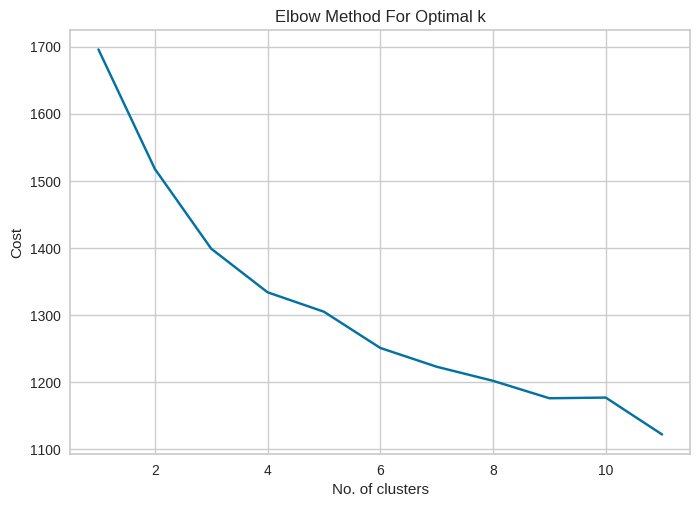

In [ ]:
# Model
cost = []

K = range(1,12)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df1)
    cost.append(kmode.cost_)


plt.plot(range(1,12), cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 74, cost: 1149.0
Run 1, iteration: 2/100, moves: 2, cost: 1149.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 90, cost: 1190.0
Run 2, iteration: 2/100, moves: 46, cost: 1170.0
Run 2, iteration: 3/100, moves: 23, cost: 1164.0
Run 2, iteration: 4/100, moves: 2, cost: 1164.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 137, cost: 1174.0
Run 3, iteration: 2/100, moves: 33, cost: 1172.0
Run 3, iteration: 3/100, moves: 1, cost: 1172.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 57, cost: 1151.0
Run 4, iteration: 2/100, moves: 34, cost: 1148.0
Run 4, iteration: 3/100, moves: 0, cost: 1148.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteratio

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

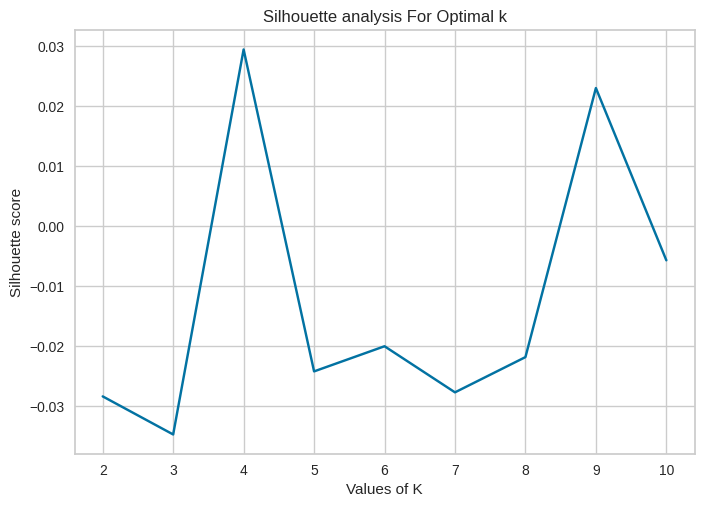

In [ ]:
#KMeans Avg Silhouette method for cluster choice confirmation (PCA Data) -->6
avg_silhouette = []

for i in range(2, 11):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df1)
    cluster_labels = kmode.labels_
    avg_silhouette.append(silhouette_score(df1, cluster_labels))

plt.plot(range(2, 11),avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

In [ ]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
kmodeclusters = kmode.fit_predict(df1)
kmodeclusters
df1['clusterofKModes']=kmodeclusters
df1

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 67, cost: 1529.0
Run 1, iteration: 2/100, moves: 11, cost: 1523.0
Run 1, iteration: 3/100, moves: 0, cost: 1523.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 54, cost: 1521.0
Run 2, iteration: 2/100, moves: 2, cost: 1521.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 54, cost: 1504.0
Run 3, iteration: 2/100, moves: 0, cost: 1504.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 28, cost: 1513.0
Run 4, iteration: 2/100, moves: 8, cost: 1513.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 66, cost: 1522.0
Run 5, iteration: 2/100, moves: 0, cost: 1522.0
Best run was number 3


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,clusterofKModes
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,2,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,2,0
2,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,2,0
3,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,2,0
4,0.727273,1.000000,0.8,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0.009091,0.092096,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0,1
314,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0,1
315,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0,1
316,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2,1


In [ ]:
# Calculate Davies-Bouldin Index for kmodes
silhouette_avg = silhouette_score(df1.drop('clusterofKModes', axis=1), df1['clusterofKModes'])
print("Silhouette Score:", silhouette_avg)
db_index = davies_bouldin_score(df1, kmodeclusters)

print(f"Davies-Bouldin Index for kModes: {db_index}")



Silhouette Score: 0.20751474925380325
Davies-Bouldin Index for kModes: 1.5209752287926575


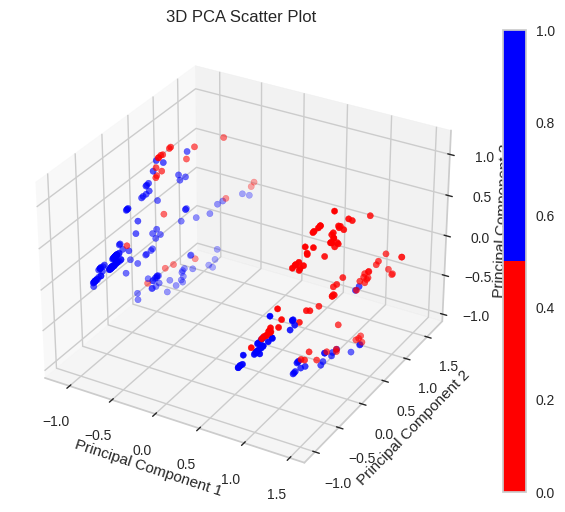

In [ ]:
# Further Dimension Reduction for Visualization
pcaSet1 = df1.copy()
pcaSet1 = pcaSet1.drop(['clusterofKModes'],axis=1)

pcaSet1.head()

components = 3
pca1 = PCA(n_components=components)

# fit and transform the data using pca
data_pca1 = pca1.fit_transform(pcaSet1)

#data ba3d pca
data_pca1= pd.DataFrame(data_pca1, columns=['PC'+str(i+1) for i in range(components)])

#data_pca1 = df.sort_values(by='price', ascending=True)
# bensheel menha eltarget columns --> classification furniture status(ask price)/clustering (price w furnishing status)

data_pca1['clusterofKModes'] = kmodeclusters

#data_pca1.head()

# Plotting a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a colormap (you can choose a different one if you like)
# cmap = ListedColormap(['red',  'blue','green','yellow'])
cmap = ListedColormap(['red',  'blue'])
# Scatter plot with RGB colors based on furnishingstatus
scatter = ax.scatter(data_pca1['PC1'], data_pca1['PC2'], data_pca1['PC3'], c=data_pca1['clusterofKModes'], cmap=cmap, marker='o')

# Create a colorbar
cbar = plt.colorbar(scatter)


# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Scatter Plot')

# Show the plot
plt.show()


## Agglomerative Clustering


In [ ]:

df1=df1.drop('clusterofKModes',axis=1)
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,2
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,2
2,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,2
3,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,2
4,0.727273,1.000000,0.8,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,0.009091,0.092096,0.2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0
314,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0
315,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
316,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2


Silhouette Score: 0.42894866495531897
Davies-Bouldin Index for Agglomerative Clustering: 0.9250185371910377


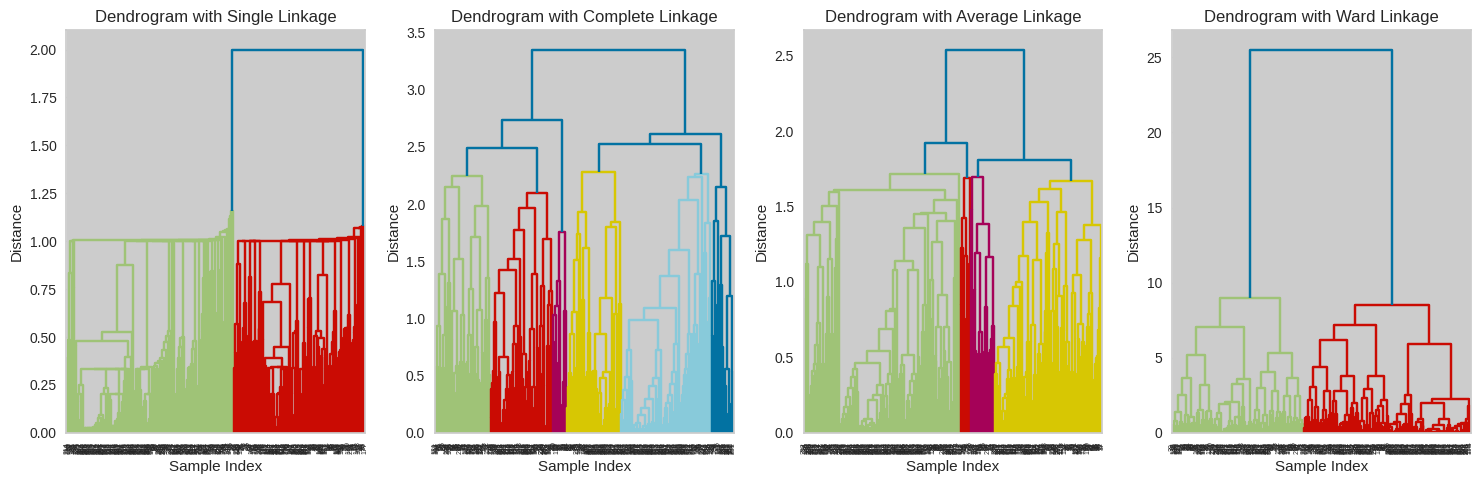

        price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0    1.000000  0.396564       0.6   0.333333  0.666667       1.0        0.0   
1    0.909091  0.502405       0.6   1.000000  1.000000       1.0        0.0   
2    0.906061  0.402062       0.6   0.333333  0.333333       1.0        0.0   
3    0.836364  0.396564       0.6   0.000000  0.333333       1.0        1.0   
4    0.727273  1.000000       0.8   0.666667  0.333333       1.0        0.0   
..        ...       ...       ...        ...       ...       ...        ...   
313  0.009091  0.092096       0.2   0.000000  0.000000       0.0        0.0   
314  0.006061  0.092784       0.2   0.000000  0.000000       1.0        0.0   
315  0.000000  0.135395       0.2   0.000000  0.000000       1.0        0.0   
316  0.000000  0.086598       0.4   0.000000  0.000000       0.0        0.0   
317  0.000000  0.151203       0.4   0.000000  0.333333       1.0        0.0   

     basement  hotwaterheating  airconditioning   p

In [ ]:
# #model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
# #mmken mahdedsh nclusters bs bakhleeh zy el ablo ashan a evaluate meen ahsan mn k means aw modes aw agglor
# model = AgglomerativeClustering(n_clusters=2)
# predicted_labels = model.fit_predict(df1)
# df1['clusterofHCI']=predicted_labels
# silhouette_avg = silhouette_score(df1.drop('clusterofHCI', axis=1), df1['clusterofHCI'])
# print("Silhouette Score:", silhouette_avg)

# db_index = davies_bouldin_score(df1, predicted_labels)
# print(f"Davies-Bouldin Index for AgglomerativeClustering: {db_index}")
# df1


import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

# Assuming df1 is your dataset

# Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=2)
predicted_labels = model.fit_predict(df1)
df1['clusterofHCI'] = predicted_labels

# Silhouette Score
silhouette_avg = silhouette_score(df1.drop('clusterofHCI', axis=1), df1['clusterofHCI'])
print("Silhouette Score:", silhouette_avg)

# Davies-Bouldin Index
db_index = davies_bouldin_score(df1, predicted_labels)
print(f"Davies-Bouldin Index for Agglomerative Clustering: {db_index}")

# Dendrogram with multiple linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(15, 5))
for i, linkage_method in enumerate(linkage_methods, 1):
    plt.subplot(1, 4, i)
    linked = linkage(df1.drop('clusterofHCI', axis=1), linkage_method)
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Dendrogram with {linkage_method.capitalize()} Linkage')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

# Display the DataFrame with cluster assignments
print(df1)


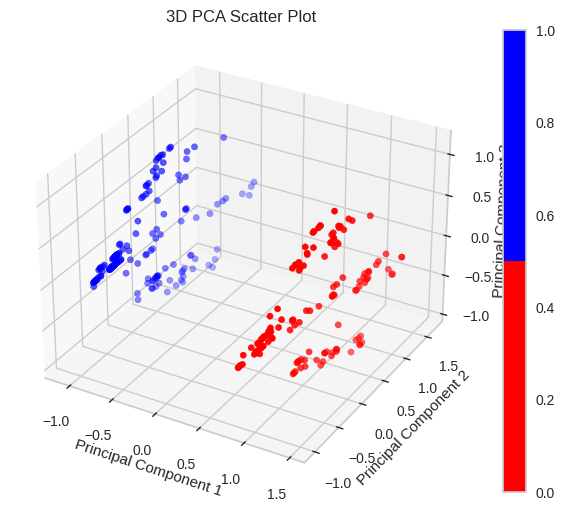

In [ ]:
# Further Dimension Reduction for Visualization
pcaSet1 = df1.copy()
pcaSet1 = pcaSet1.drop(['clusterofHCI'],axis=1)

pcaSet1.head()

components = 3
pca1 = PCA(n_components=components)

# fit and transform the data using pca
data_pca1 = pca1.fit_transform(pcaSet1)

#data ba3d pca
data_pca1= pd.DataFrame(data_pca1, columns=['PC'+str(i+1) for i in range(components)])

#data_pca1 = df.sort_values(by='price', ascending=True)
# bensheel menha eltarget columns --> classification furniture status(ask price)/clustering (price w furnishing status)

data_pca1['clusterofHCI'] = predicted_labels

#data_pca1.head()

# Plotting a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create a colormap (you can choose a different one if you like)
#cmap = ListedColormap(['red', 'blue','green','yellow'])
cmap = ListedColormap(['red',  'blue'])
# Scatter plot with RGB colors based on furnishingstatus
scatter = ax.scatter(data_pca1['PC1'], data_pca1['PC2'], data_pca1['PC3'], c=data_pca1['clusterofHCI'], cmap=cmap, marker='o')

# Create a colorbar
cbar = plt.colorbar(scatter)


# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Scatter Plot')

# Show the plot
plt.show()
